# CSC 8515 - Machine Learning
### Nirajan Koirala
### Checkpoint 2 

In [1]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")
import tensorflow as tf
from IPython.display import Image


In [2]:
data = pd.read_csv("adult.csv")

In [3]:
data.shape

(48842, 15)

## 1. Data Cleaning and feature transformations

In [4]:
census = data.copy()

First, lets look at our data:

In [5]:
census.education.unique()


array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [6]:
census.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Check for any null values if present:

In [7]:
census.isnull().values.any()

False

Looks like we don't have any null values present in our data. Let's check if any duplicate rows are present.

In [8]:
census.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [9]:
duplicateRowsDF = census[census.duplicated()]
duplicateCount = duplicateRowsDF.shape[0]
duplicateCount

52

In [10]:
census.drop_duplicates(keep='last',inplace=True) 

In [11]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
age                48790 non-null int64
workclass          48790 non-null object
fnlwgt             48790 non-null int64
education          48790 non-null object
educational-num    48790 non-null int64
marital-status     48790 non-null object
occupation         48790 non-null object
relationship       48790 non-null object
race               48790 non-null object
gender             48790 non-null object
capital-gain       48790 non-null int64
capital-loss       48790 non-null int64
hours-per-week     48790 non-null int64
native-country     48790 non-null object
income             48790 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [12]:
census['hours-per-week'].min()

1

We have removed the duplicate values and the data contains only unique rows for now.

# The attributes of the dataset: 

## 1. Categorical Attributes

### Work-class :
- Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

### Education : 
- Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

### Martial Status :
- Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

### Occupation :
- Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

### Relationship (individual's relation in a family) :
- Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

### Race :
- White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

### Gender : 
- Female, Male.

### Native-country :
- United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## 2. Continuous Attributes

### Age: 
- Between 17 and 90.
 
### Educational-num (number of years spent on education) :
- Between 1 and 16.

### Fnlwgt (sampling weight based on residency and employment) :
- Between 12285 and 1490400

### Capital-gain (assests and investments):
- Between 0 and 99999

### Capital-loss (assests and investments):
- Between 0 and 4356

### Hours-per-week (number of hours worked/week):
- Between 1 and 99

## 3. Label (categorical):
### Income
- Either <=50k or >50k.


In [13]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
age                48790 non-null int64
workclass          48790 non-null object
fnlwgt             48790 non-null int64
education          48790 non-null object
educational-num    48790 non-null int64
marital-status     48790 non-null object
occupation         48790 non-null object
relationship       48790 non-null object
race               48790 non-null object
gender             48790 non-null object
capital-gain       48790 non-null int64
capital-loss       48790 non-null int64
hours-per-week     48790 non-null int64
native-country     48790 non-null object
income             48790 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [14]:
print('workclass',census.workclass.unique())
print('education',census.education.unique())
print('marital-status',census['marital-status'].unique())
print('occupation',census.occupation.unique())
print('relationship',census.relationship.unique())
print('race',census.race.unique())
print('gender',census.gender.unique())
print('native-country',census['native-country'].unique())
print('income',census.income.unique())

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

Workclass, native country and occupation contains some categories as '?' 

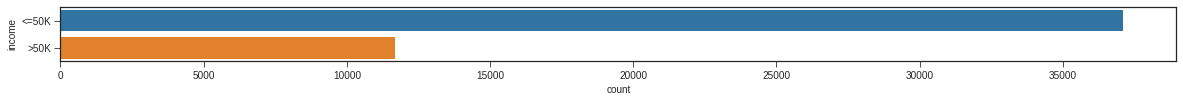

In [15]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=census)

In [16]:
# checking for inconsistent rows in dataset

census[(census['relationship'] == "Husband") & (census['gender'] == "Female")]
census[(census['relationship'] == "Wife") & (census['gender'] == "Male")]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
5661,64,Local-gov,152172,10th,6,Married-civ-spouse,Machine-op-inspct,Wife,White,Male,0,0,40,?,<=50K
16856,29,Private,350162,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Male,0,0,40,United-States,>50K
43422,36,Private,74791,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Male,0,0,60,?,<=50K


In [17]:

# Get names of indexes 
indexNames1 = census[(census['relationship'] == "Wife") & (census['gender'] == "Male") ].index
indexNames2 = census[(census['relationship'] == "Husband") & (census['gender'] == "Female") ].index



In [18]:
# Delete these row indexes from dataFrame where Husbands are female and Wives are males
census.drop(indexNames1, inplace=True)
census.drop(indexNames2, inplace=True)

# Feature transformation

## WorkClass

In [19]:
print('Workclass: ',census.workclass.unique())

Workclass:  ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


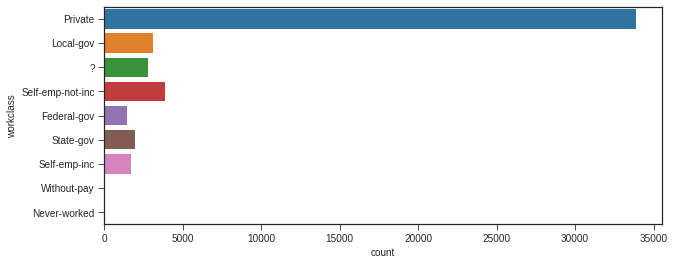

In [20]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,4)) 
sns.countplot(y="workclass", data=census)


The workclass contains '?' values which is not specified. We can either replace those values with the median or drop the rows containing '?' values. Lets find out the total percentage of these values present in our data. 

In [21]:
print("Percentage of '?' values in workclass feature - {0:.2f}%".format((len((census[census['workclass']=='?']))/len(census['workclass']))*100))

Percentage of '?' values in workclass feature - 5.73%


We would impute them '?' values with the mode category, Private which already accounts for a significant portion of the category.

Looking at the graph, clearly we can see that the median is Private for workclass. We replace all the '?' values with Private

In [22]:
census['workclass'] = census['workclass'].replace('?','Private')

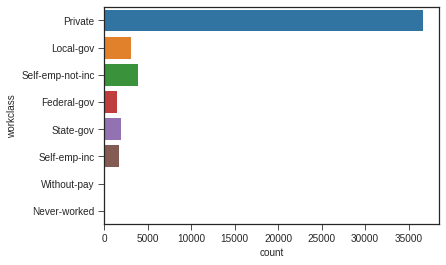

In [23]:
sns.countplot(y="workclass", data=census)

Now that we've got rid of the '?' values, we can work on transforming these features into some meaningful categories.

We can change the workclass categories into Private, Public, Self-Employed and Unemployed. The Public category will include Local-gov, Federal-gov, State-gov. The Self-employed category will include Self-emp-not-inc and Self-emp-inc. The Unemployed includes Without-pay and Never-worked categories.

In [24]:
print('Workclass: ',census.workclass.unique()) 

Workclass:  ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


In [25]:
public = ['Local-gov','Federal-gov', 'State-gov']
census['workclass'] = census['workclass'].replace(public,'Public')

In [26]:
self_emp = ['Self-emp-not-inc', 'Self-emp-inc']
census['workclass'] = census['workclass'].replace(self_emp,'Self-Employed')

In [27]:
unemployed = ['Without-pay', 'Never-worked']
census['workclass'] = census['workclass'].replace(unemployed,'Unemployed')

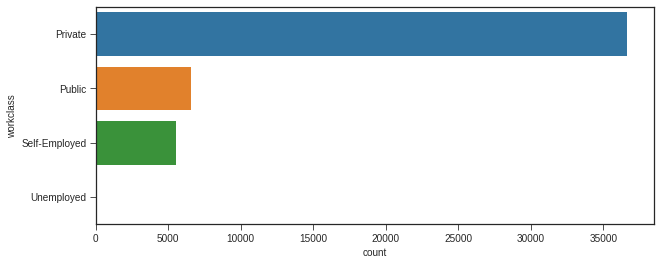

In [28]:
plt.figure(figsize=(10,4)) 
sns.countplot(y="workclass", data=census)

# Education

In [29]:
print('Education: ',census.education.unique())

Education:  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']


We have many categories for education. Instead of accounting all of these categories lets transform them into High-School dropout, High-School, Associate, Bachelors, Masters, Professional, and Doctorate.

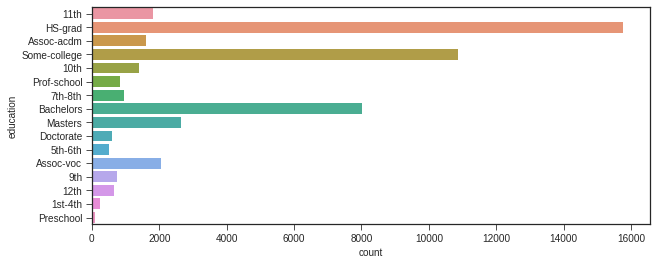

In [30]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,4)) 
sns.countplot(y="education", data=census)

In [31]:
high_school_dropout = ['11th', '10th', '7th-8th', '5th-6th', '9th', '12th', '1st-4th', 'Preschool']
census['education'] = census['education'].replace(high_school_dropout,'HS-dropout')

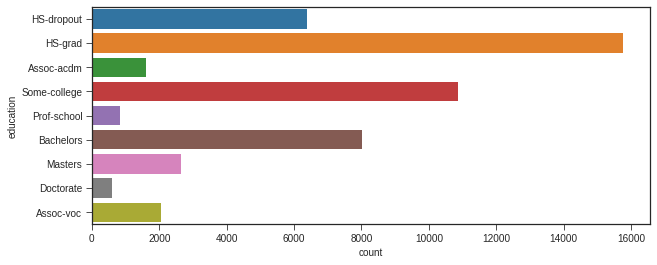

In [32]:
plt.figure(figsize=(10,4)) 
sns.countplot(y="education", data=census)

In [33]:
census['education'] = census['education'].replace(['Assoc-acdm','Some-college','Assoc-voc'],'Associate')

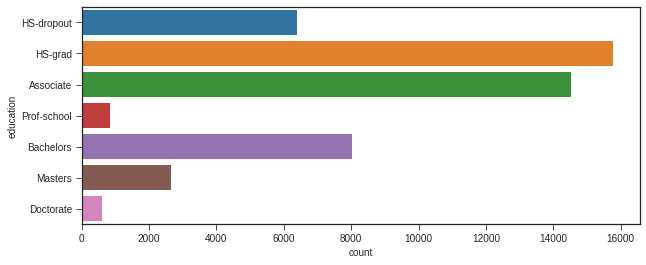

In [34]:
plt.figure(figsize=(10,4)) 
sns.countplot(y="education", data=census)

# Martial Status

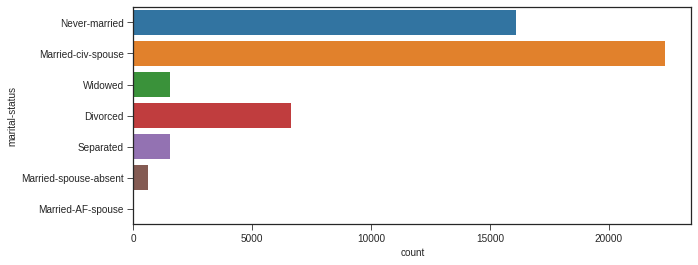

In [35]:
plt.figure(figsize=(10,4)) 
sns.countplot(y="marital-status", data=census)

In [36]:
census['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse','Married-spouse-absent'], 'Married',inplace=True)
census['marital-status'].replace(['Separated','Divorced'], 'Separated',inplace=True)

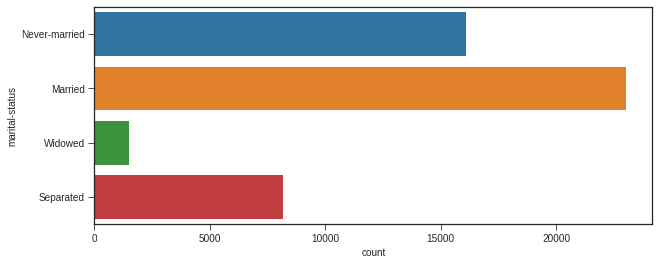

In [37]:
plt.figure(figsize=(10,4)) 
sns.countplot(y="marital-status", data=census)

We have transformed marital-status into some meaningful categories - Never-married, Married, Widowed, Separated.

# Occupation

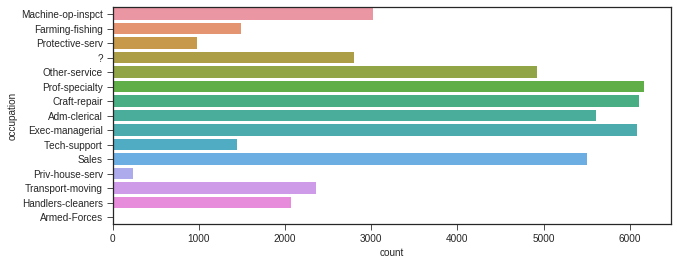

In [38]:
plt.figure(figsize=(10,4)) 
sns.countplot(y="occupation", data=census)

We have some '?' values in our occupation feature. Let's check out the total percentage of these values present in our data.

In [39]:
print("Percentage of '?' values in occupation feature - {0:.2f}%".format((len((census[census['occupation']=='?']))/len(census['occupation']))*100))

Percentage of '?' values in occupation feature - 5.75%


We have about 6% of the occupation feature containing '?' values. It could be replaced them with the mode of the occupation category. It's not quite clear which is the mode looking at the graph only this time so we'll be using numpy's argmax.

In [40]:
attrib, counts = np.unique(census['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
most_freq_attrib

'Prof-specialty'

The categories in the occupation column are very distributed and we cannot transform them into fewer categories since
no any meaningful relationship between them could be found. So, we will be dropping the "?" values from occupation feature.

In [41]:
census = census[census['occupation'] != '?']
census.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,HS-dropout,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Public,336951,Associate,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Associate,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,HS-dropout,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Relationship (individual's relation in a family)

<Figure size 864x720 with 0 Axes>

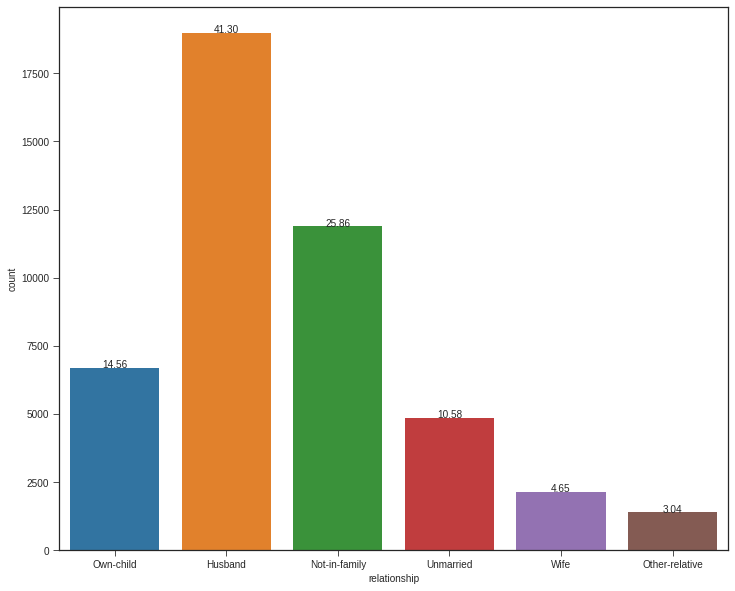

In [42]:
plt.figure(figsize=(12,10))
total = float(len(census) )

def drawPlot(feature):
    
    plt.figure(figsize=(12,10))
    total = float(len(census) )
    ax = sns.countplot(x=feature, data=census)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    plt.show()

drawPlot('relationship')

We have relatively few categories in this relationship feature and again no any meaningful relation between them can be found so no transformation is needed for this feature

# Race

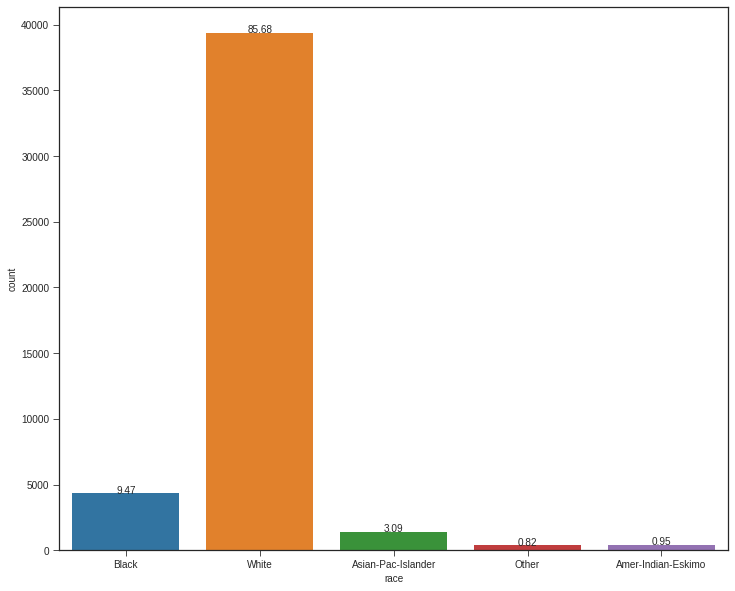

In [43]:
drawPlot('race')

Here, we can see that almost 86% of the race feature contains white. The data for other races is not enough to draw conclusions for each of the individual races. So, to make our classifier generalize well,  we'll replace the categories with White and Non-White.

In [44]:
census['race'].replace(['Black','Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'], 'Non-White',inplace=True)

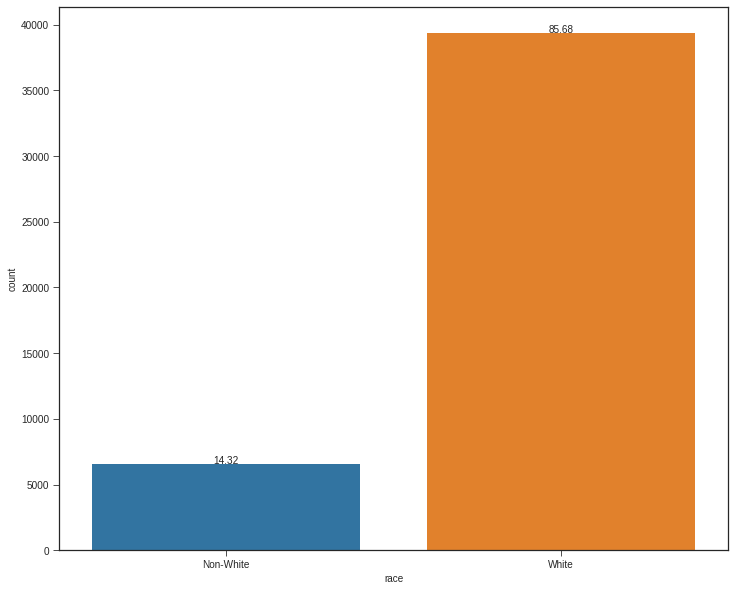

In [45]:
drawPlot('race')

# Gender

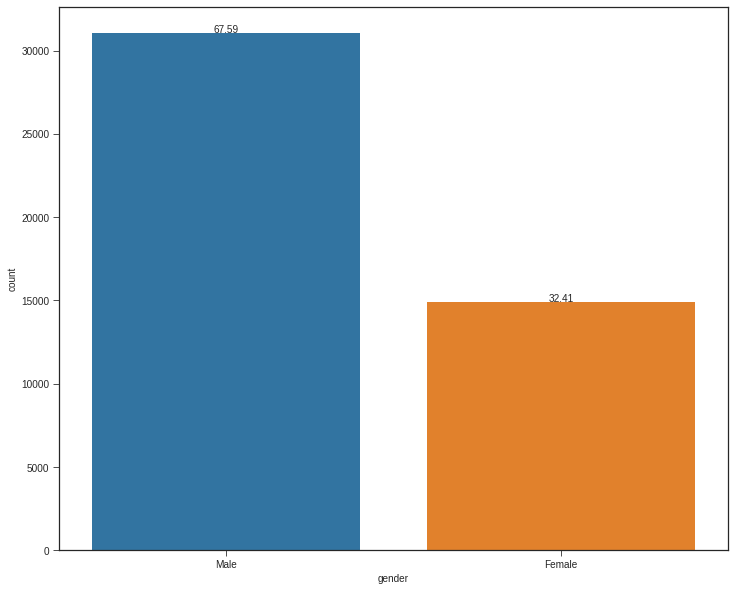

In [46]:
drawPlot('gender')

Most of the data contains male values in gender feature, so the algorithms may not be able to generalize well for the female in testing data.

# Native-Country

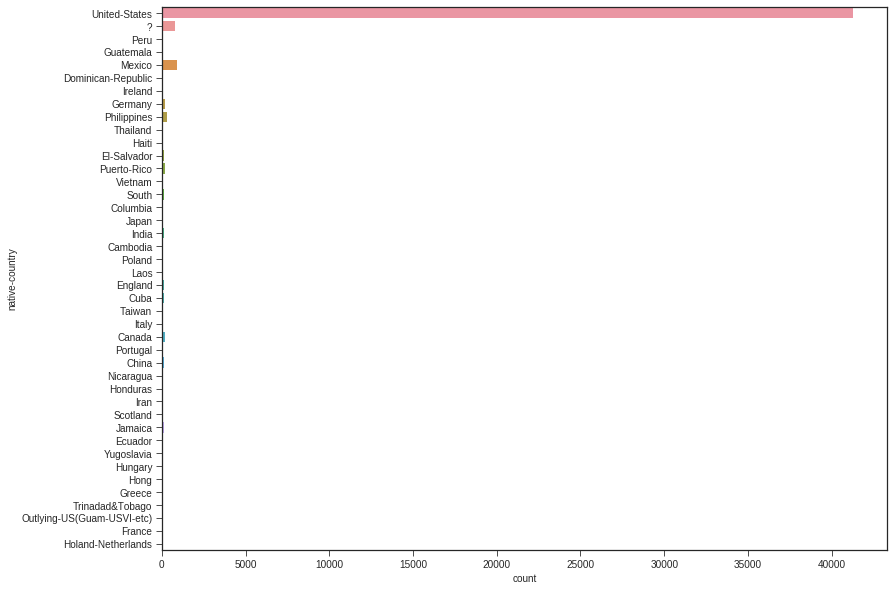

In [47]:
plt.figure(figsize=(13,10)) 
sns.countplot(y="native-country", data=census)

Some values are represented as '?', so let's see its total percentage representaion of the native-country feature.

In [48]:
print("Percentage of '?' values in native-country feature - {0:.2f}%".format((len((census[census['native-country']=='?']))/len(census['native-country']))*100))

Percentage of '?' values in native-country feature - 1.76%


Since, '?' 's representation in the native-country feature is less than 2%. We will replace these values with US as it already present in 90% of our data.

In [49]:
census['native-country'].replace('?', 'United-States',inplace=True)

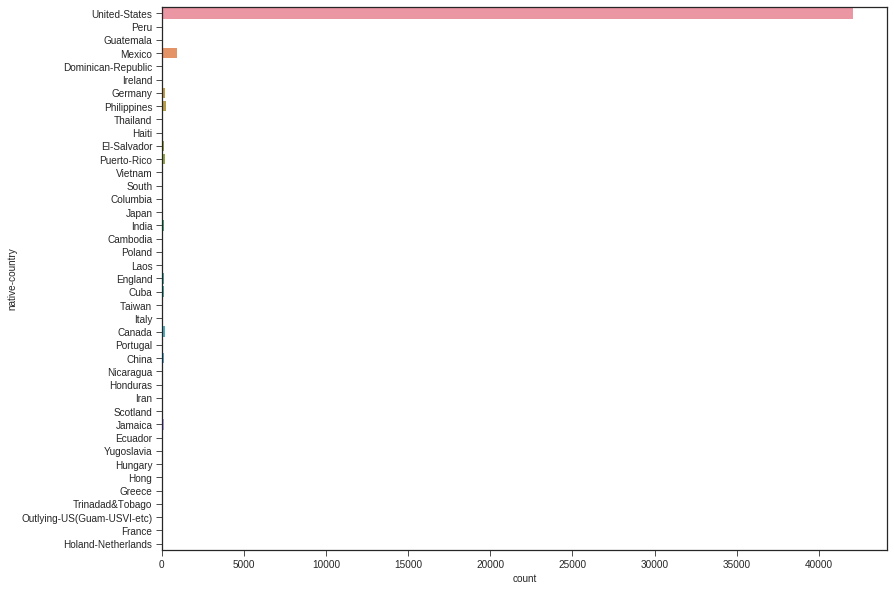

In [50]:
plt.figure(figsize=(13,10)) 
sns.countplot(y="native-country", data=census)

In [51]:
census.shape

(45981, 15)

To make the algorithms generalize well on the testing data, the categories for native-country will be United-States and Non-United States.

In [52]:
print(census['native-country'].unique())

['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


In [53]:
non_United_States = ['Peru', 'Guatemala', 'Mexico', 'Dominican-Republic', 'Ireland', 'Germany', 'Philippines', 
                     'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam', 'South', 'Columbia', 
                     'Japan', 'India', 'Cambodia', 'Poland', 'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 
                     'Canada', 'Portugal', 'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica', 
                     'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 
                     'France', 'Holand-Netherlands']

In [54]:
census['native-country'] = census['native-country'].replace(non_United_States,'Non-United-States')

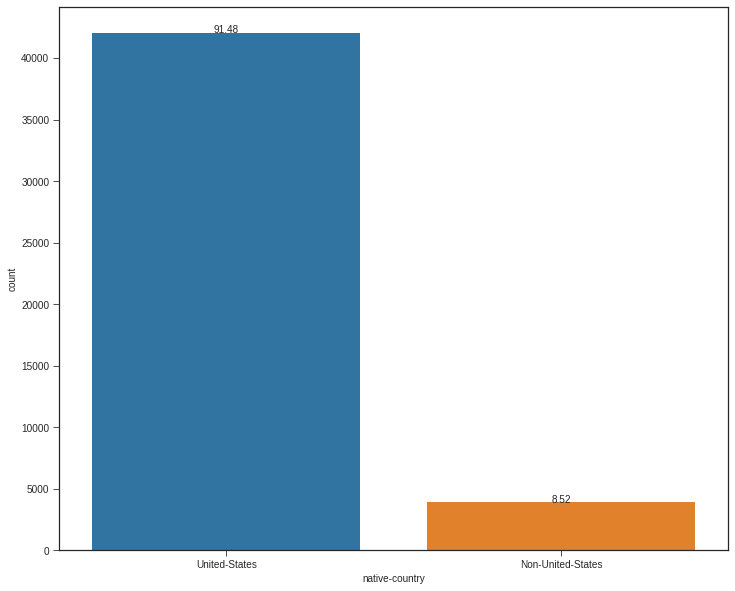

In [55]:
drawPlot('native-country')

We can completed transformations for the categorical features in our dataset.

# 2. Exploratory Data Analysis

In [56]:
census.describe() # the continuous attributes 

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45981.000000,4.598100e+04,45981.000000,45981.000000,45981.000000,45981.000000
mean,38.564690,1.898103e+05,10.129793,1115.592854,88.829691,40.952502
std,13.201795,1.054889e+05,2.562941,7593.769326,405.535069,12.011608
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378190e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [57]:
Image(url='https://i.imgur.com/75mDCdM.png')

Capital-gain and Capital-loss have more than 90% of their values as 0. The feature fnlwgt have significantly high values and range. These 3 features may not help us in visualization, so they'll be skipped for now.

In [58]:
# the categorical attributes
census.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45981,45981,45981,45981,45981,45981,45981,45981,45981
unique,4,7,4,14,6,2,2,2,2
top,Private,HS-grad,Married,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33857,14957,22049,6165,18991,39396,31078,42062,34566


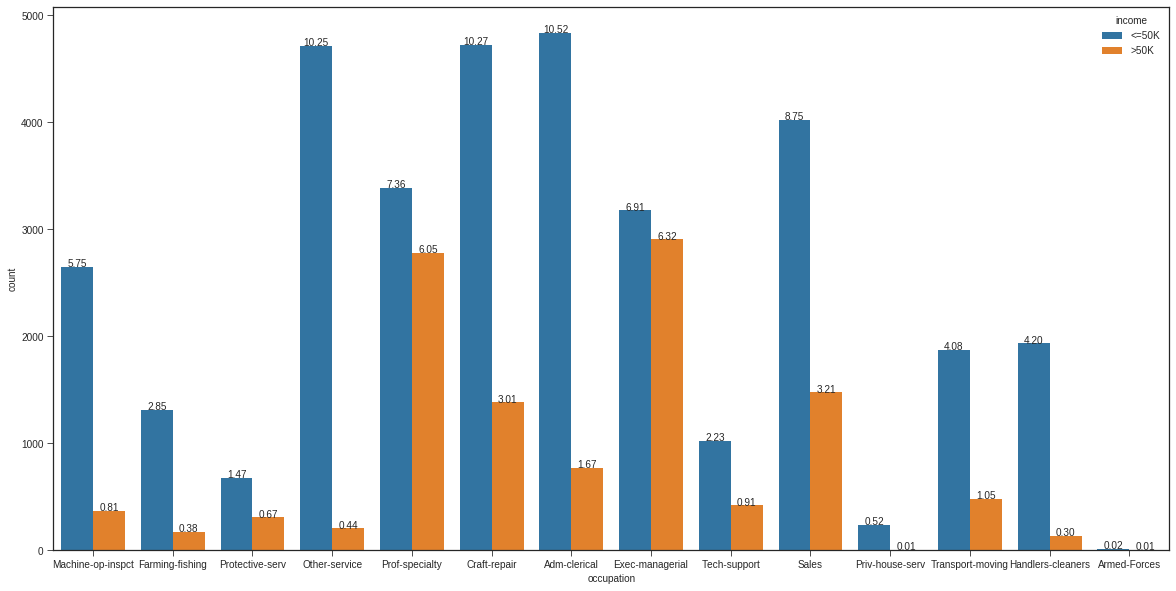

In [59]:
# function to visualize each categorical sttribute with respect to the income

def getCatIncomePlot(Cat):
    plt.figure(figsize=(20,10))
    total = float(len(census["income"]) )

    ax = sns.countplot(x=Cat, hue="income", data=census)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format((height/total)*100),
                ha="center") 
    plt.show()

getCatIncomePlot("occupation")


Occupations like Prof-speciality ( professional speciality) and exec-managerial have significantly higher number of people having more than 50k income.

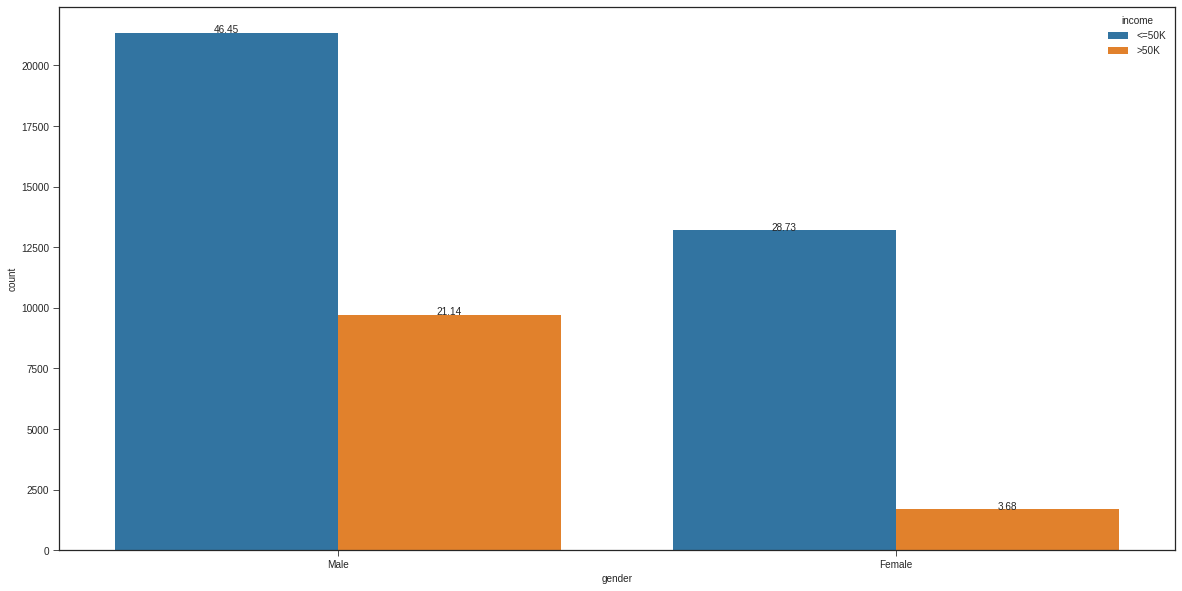

In [60]:
getCatIncomePlot("gender")

Being a male also increases one's chances of having income greater than 50k

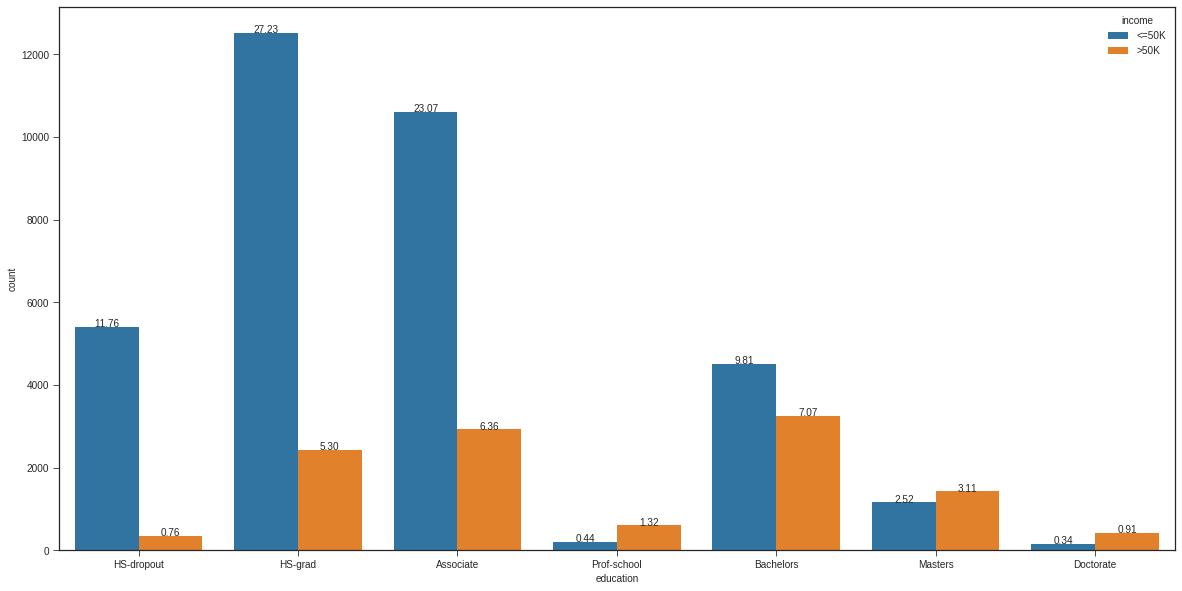

In [61]:
getCatIncomePlot("education")

Here, it can be observed that the more education one has the more chances of having income greater than 50k.

## 2.1 Analysis of each feature with income

### 2.1.1 Age

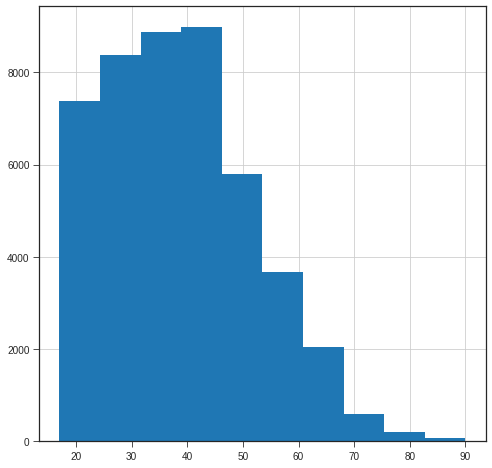

In [62]:
census['age'].hist(figsize=(8,8))
plt.show()

We can observe that age is right-skewed. Data contains very few observations of people who are older than 70 years. 

Let's observe if the age co-relates with the income.
We'll discretize the age attribute to ease the visualization.

,income,age
1,>50K,44.013841
0,<=50K,36.765174


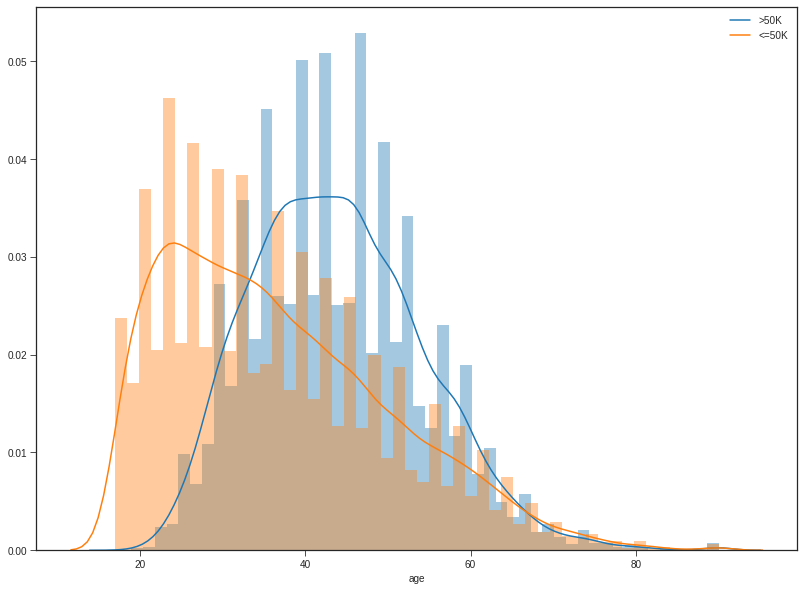

In [63]:
fig = plt.figure(figsize=(30,10)) 

plt.subplot(1, 2, 2)

sns.distplot(census[census['income'] == '>50K']['age'], kde_kws={"label": ">50K"})
sns.distplot(census[census['income'] == '<=50K']['age'], kde_kws={"label": "<=50K"})

census[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

The mean ages of people who earn >50k is greater than the mean ages of people earning <=50k.

### 2.1.2 Hours-per-week

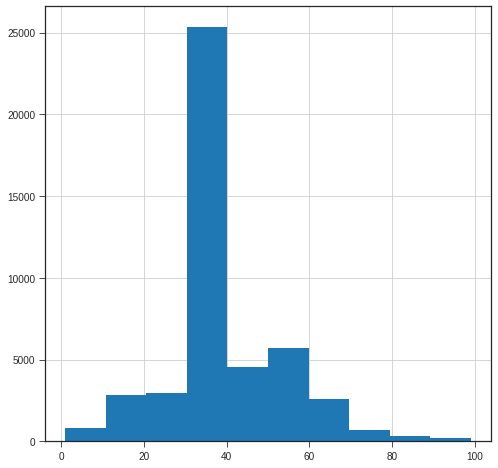

In [64]:
census['hours-per-week'].hist(figsize=(8,8))
plt.show()


Most of the people are working about 35-40 hrs per week. There are very few working more than 70 hours per week and a good amount of people are working less than 20 hrs/week. Observing the histogram, most of the people (roughly 80 percent) are working between 35-60 hrs/week.

,income,hours-per-week
1,>50K,45.692597
0,<=50K,39.387143


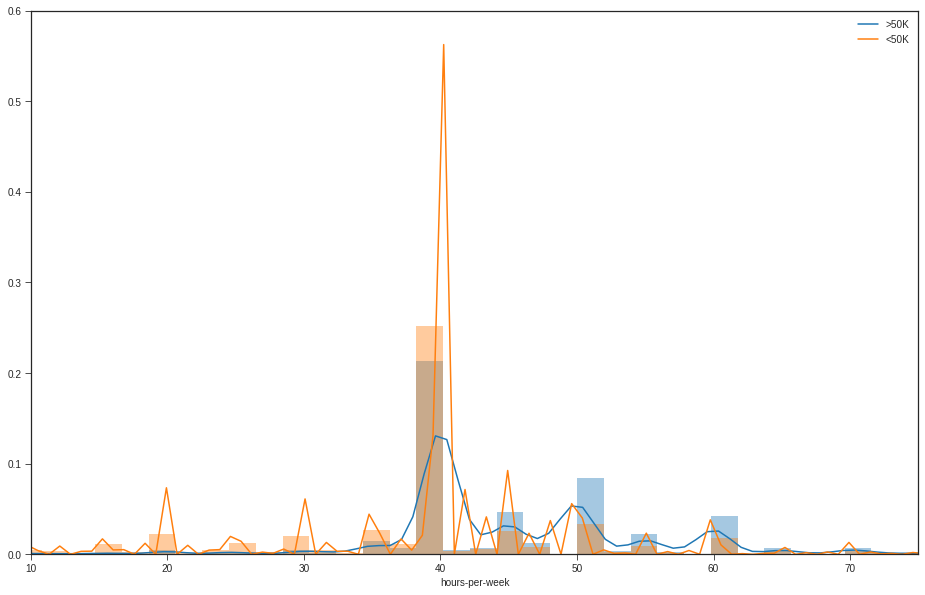

In [65]:

fig = plt.figure(figsize=(35,10)) 
plt.subplot(1, 2, 2)
sns.distplot(census[census['income'] == '>50K']['hours-per-week'], kde_kws={"label": ">50K"})
sns.distplot(census[census['income'] == '<=50K']['hours-per-week'], kde_kws={"label": "<50K"})
plt.ylim(0, 0.6)
plt.xlim(10, 75)

census[['income', 'hours-per-week']].groupby(['income'], as_index=False).mean().sort_values(by='hours-per-week', ascending=False)

Here, we can observe as people working >=45hrs per week have better chances of earning >50k.

### 2.1.3 Educational-num and Education


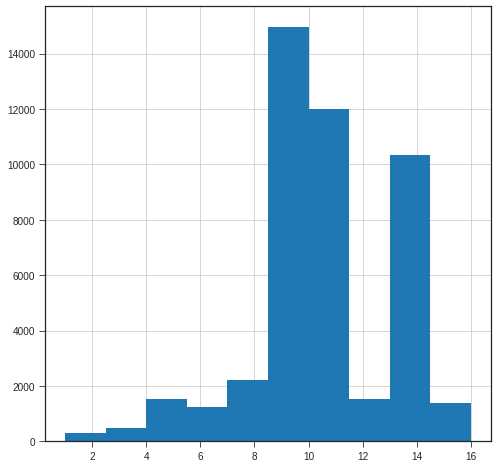

In [66]:
census['educational-num'].hist(figsize=(8,8))
plt.show()


,income,educational-num
1,>50K,11.612440
0,<=50K,9.640167


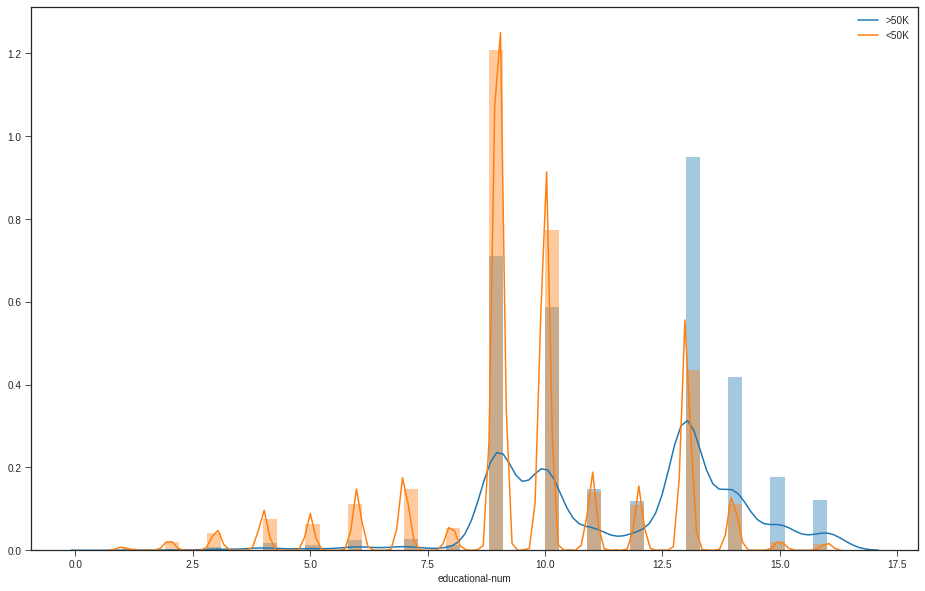

In [67]:
census['educational-num_bin'] = pd.cut(census['educational-num'], 1)


fig = plt.figure(figsize=(35,10)) 

#sns.countplot(y="educational-num", data=census);
plt.subplot(1, 2, 2)

sns.distplot(census[census['income'] == '>50K']['educational-num'], kde_kws={"label": ">50K"})
sns.distplot(census[census['income'] == '<=50K']['educational-num'], kde_kws={"label": "<50K"})


census[['income', 'educational-num']].groupby(['income'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

Having more than 11 years of education significantly increases one's chances of having >50 income. 

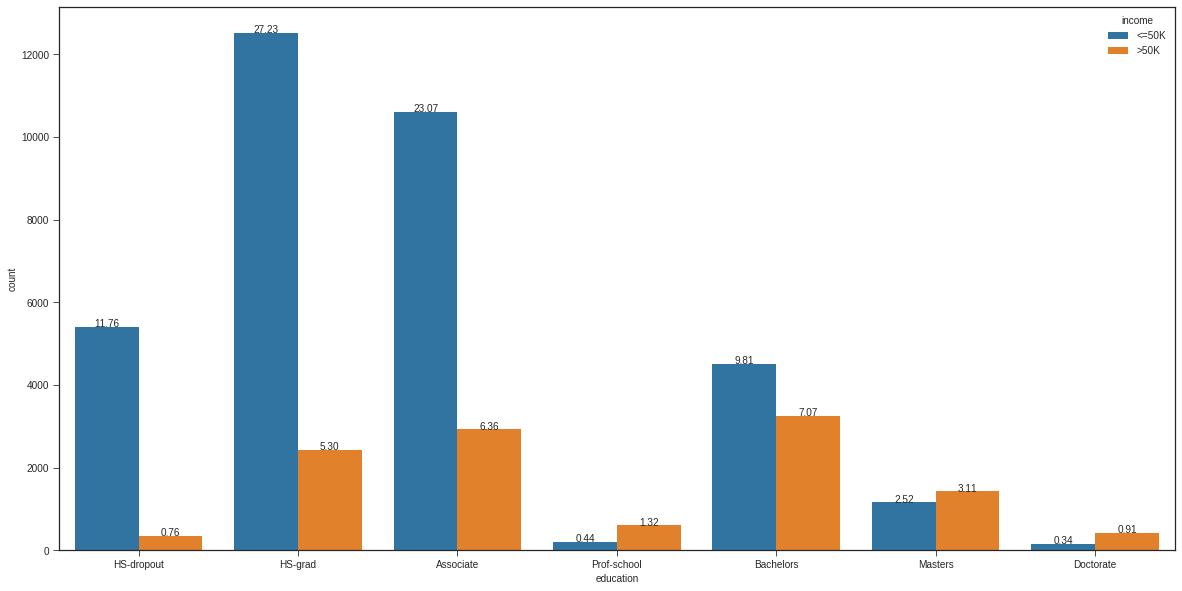

In [68]:
getCatIncomePlot('education')

In [69]:
census[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
2,Doctorate,16.000000
6,Prof-school,15.000000
5,Masters,14.000000
1,Bachelors,13.000000
0,Associate,10.372136
4,HS-grad,9.000000
3,HS-dropout,5.616493


From the above histgram and table, we can observe that having more number of education certainly leads to having >50 income. However, even though Prof-school has educational-num less than Doctorate, it has more number of people earning >50k.

- Less than Bachelors: 16.7% people having a degree less than Bachelors earn >50k.
- Bachelors: 41.9% people having Bachelors earn >50k.
- Masters: 55.2% of people having Masters earn >50k.
- Prof-School: 75.0% of people having Professional Degree earn >50k.
- Doctorate: 72.8% of people having a Doctorate earn >50k.

### 2.1.4 Workclass

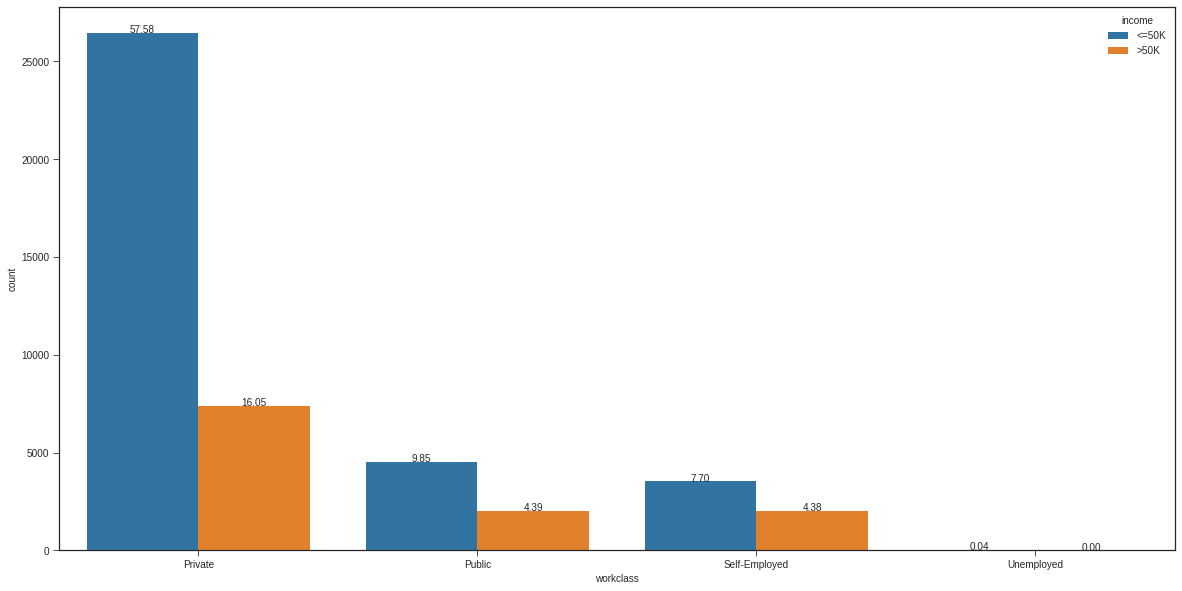

In [70]:
getCatIncomePlot("workclass")

Percentage of people having >50k income in each category:

- Private : 21.8%
- Public : 30.8%
- Self-Emp : 36.3% 

Highest proportion of people earning >50k is found in Self-Emp category of the workclass feature. 


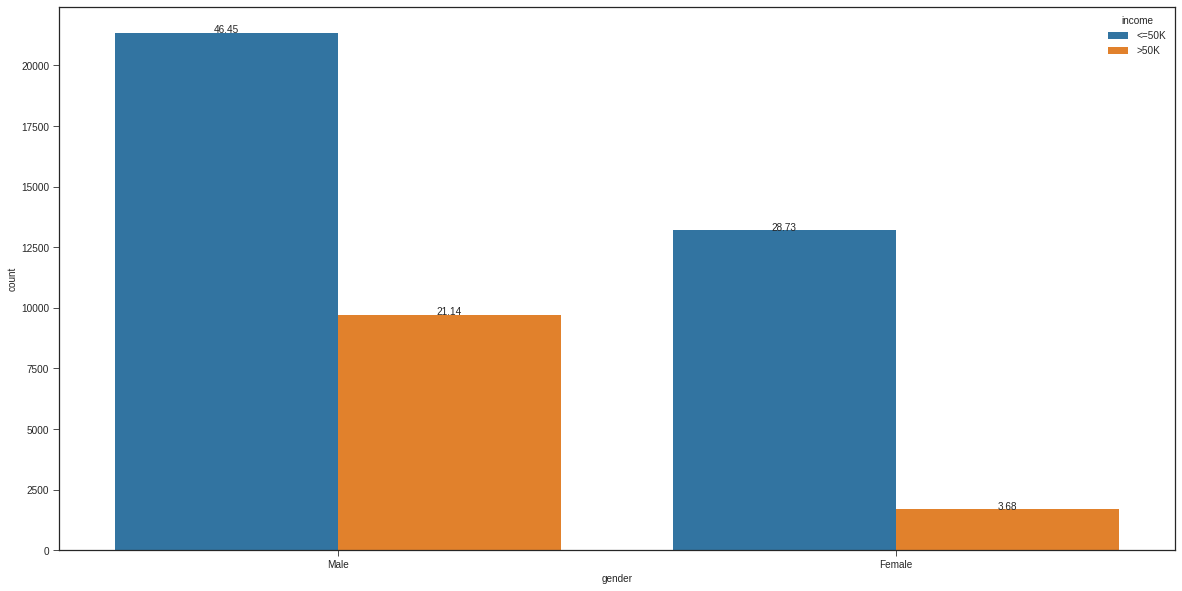

In [71]:
getCatIncomePlot("gender")

Percentage of people having >50k income in each category:

- Male: 31.3%
- Female: 11.4%

Proportion of males having >50k income is almost 3 times that of women earning >50k.


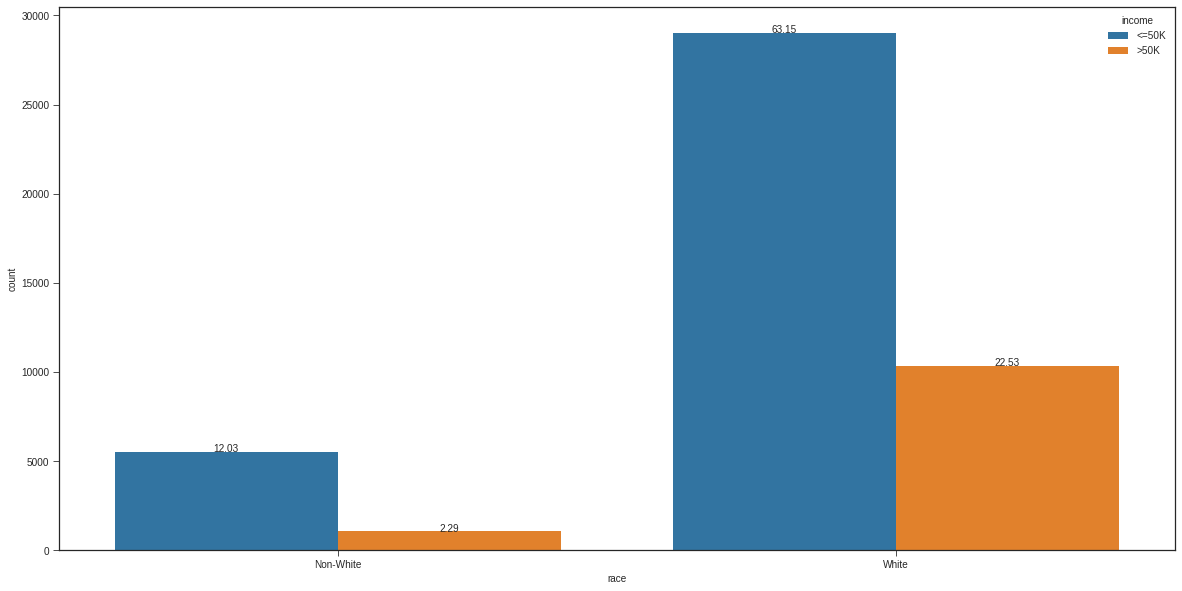

In [72]:
getCatIncomePlot("race")

Percentage of people having >50k income in race category:

- White: 26.3%
- Non-White: 16.0%
    
White race seems to have a higher proportion with people having income >50k but it is not sufficient to confir using this graph only. The majority of the people are of white race and it might be that the representation of non-whites is too low to confirm that one race earns higher income than the other.

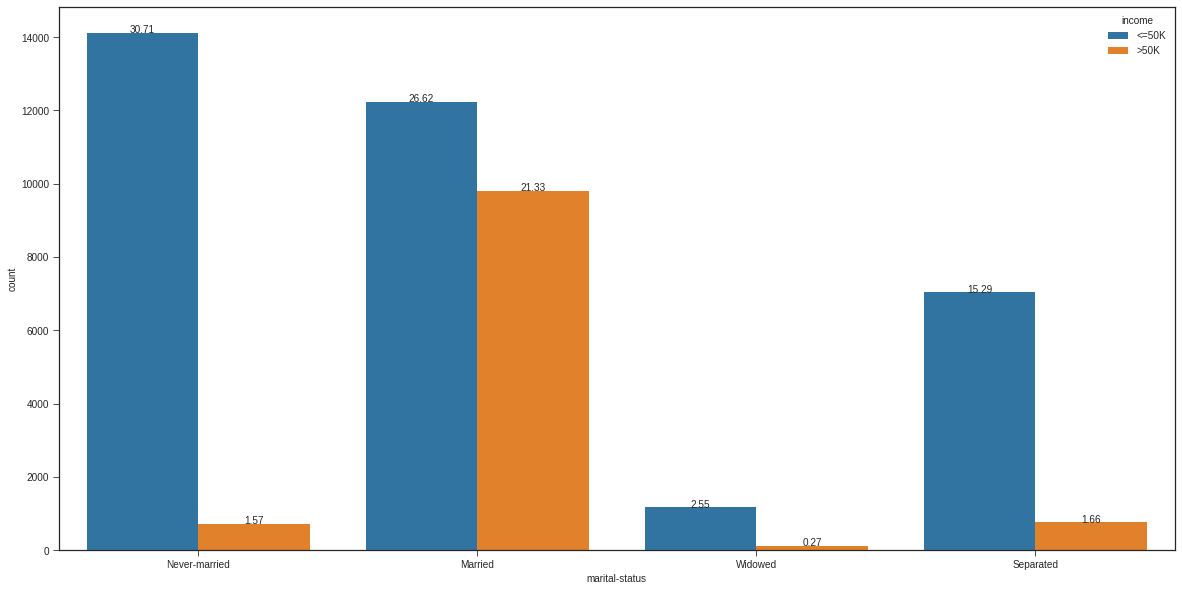

In [73]:
getCatIncomePlot("marital-status")

Percentage of people having >50k income in marital-status category:

- Never-married:4.9%
- Married: 44.5%
- Widowed: 9.6%
- Separated: 9.7%

It can be observed clearly that married people are earning more than the non-married ones. We will need to perform hypothesis testing to confirm this coorealation of marital-status and income.

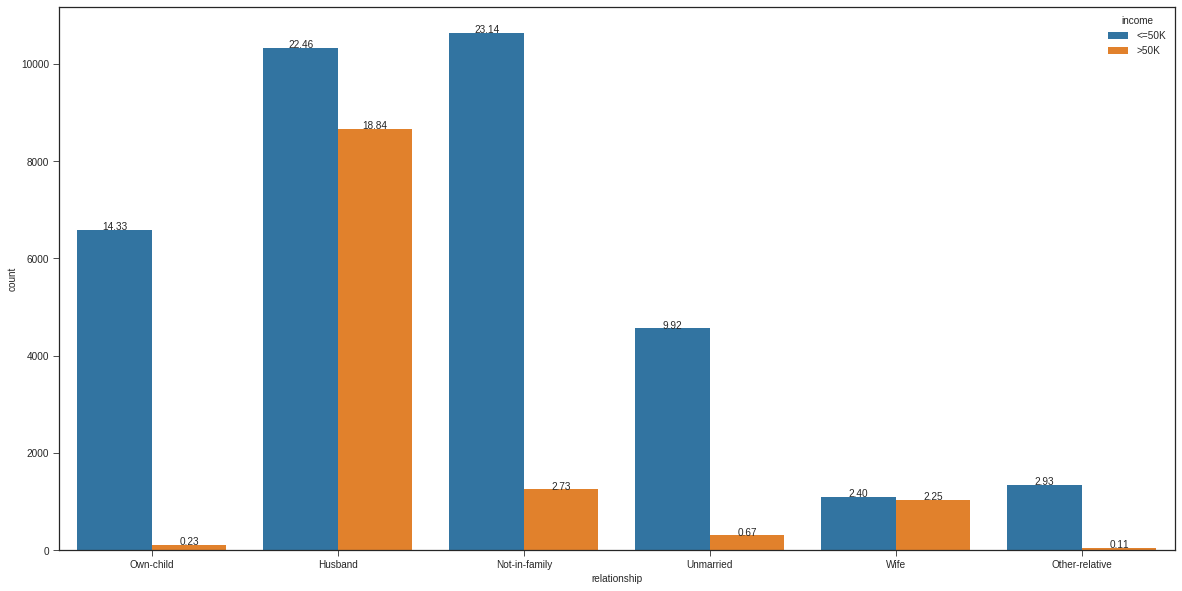

In [74]:
getCatIncomePlot("relationship")

Percentage of people having >50k income in relationship category:

- Own-child: 1.6%
- Husband: 45.6%
- Not-in-family: 10.5%
- Unmarried: 6.3%
- Wife: 48.4%
- Other-relative: 3.6%

Again, clearly one can observe that husband and wives are earning significantly more than people with other relationships.

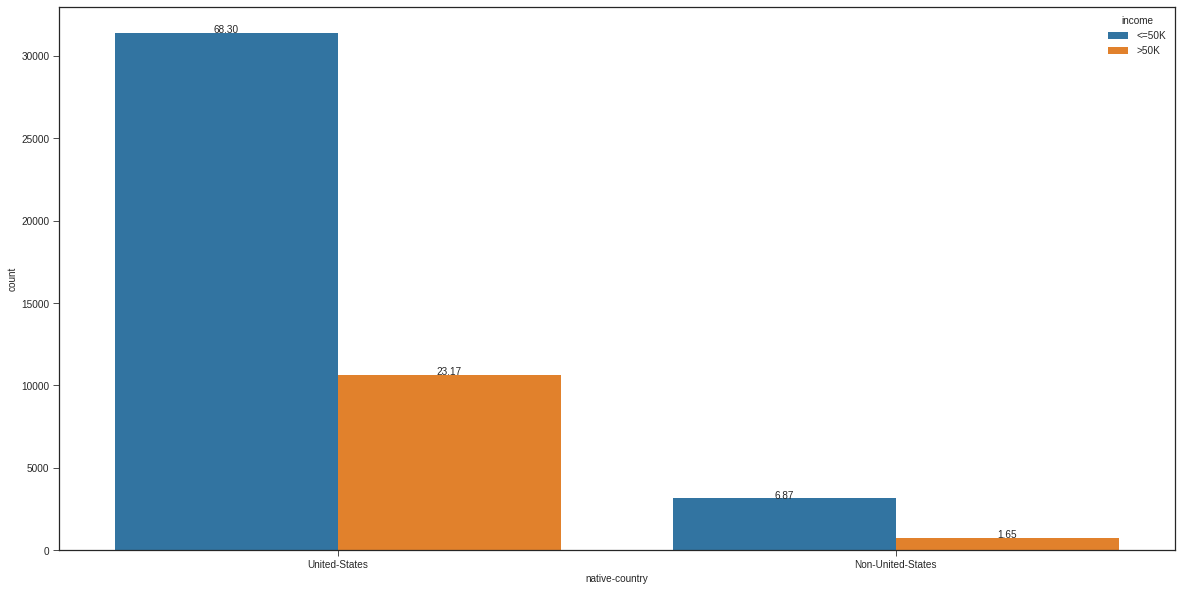

In [75]:
getCatIncomePlot("native-country")

Percentage of people having >50k income in native-country category:

- United-States: 25.3% 
- Non-United States: 19.4%
    
People with United-States as a native country seems to have higher incomes. However, the native-country is not widely distributed between its categories and drawing any conclusion based on this graph may be insufficient.

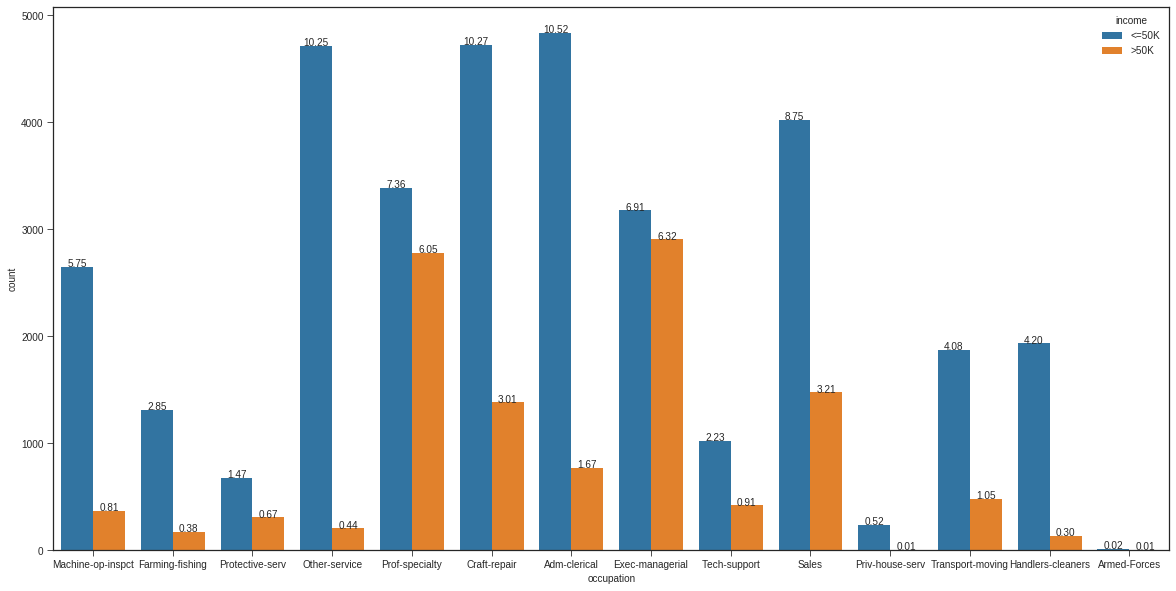

In [76]:
getCatIncomePlot("occupation")

Percentage of people having >50k income in occupation category:

Top-5:
- Exec-managerial: 47.8%
- Prof-Specialty: 45.1%
- Tech-support: 40.8%
- Protective-serv: 31.3%
- Sales: 26.8%
    
Here, the data is widely distributed among the occupation categories. The high-earners are the people with managerial, professional-specialty and sales jobs.

## Plotting all the numerical features against each other

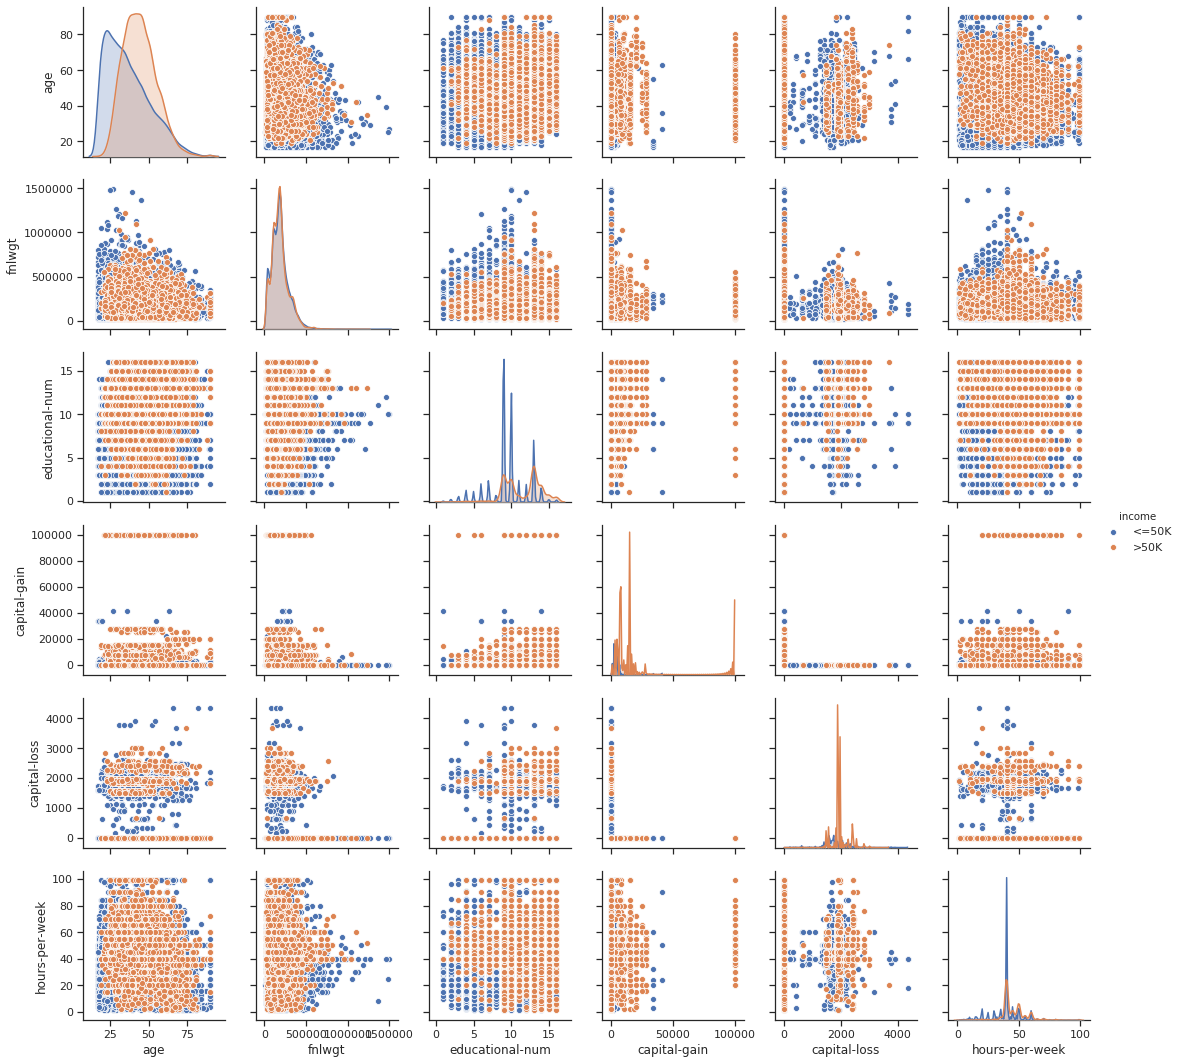

In [77]:

sns.set(style="ticks")
sns.pairplot(data, hue="income")
plt.show()

## Coorelation Heatmap for the numeric attributes

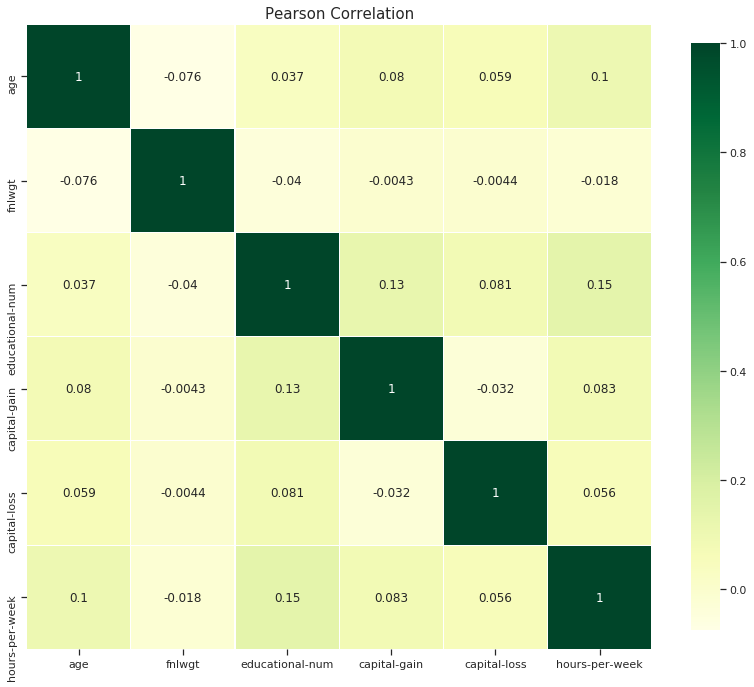

In [78]:
def correlation_heatmap(df):
    
    heat, ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    heat = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation', y=1.05, size=15)

correlation_heatmap(census)

Here, we can observe the level of coorelation of each numerical attribute with the income. The coorelation level list in the ascending order with income is educational-num, age, hours-per-week, capital-gain, capital-loss and fnlwgt.
A very low negative corelation of the attribute fnlwgt and income is observed. We might be better off dropping this feature while building our final models for prediction.

## Correlational Heatmap for each of the attributes with income

In [79]:
catdata = census.copy()

In [80]:
catdata.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,educational-num_bin
0,25,Private,226802,HS-dropout,7,Never-married,Machine-op-inspct,Own-child,Non-White,Male,0,0,40,United-States,<=50K,"(0.985, 16.0]"
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,"(0.985, 16.0]"
2,28,Public,336951,Associate,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,"(0.985, 16.0]"
3,44,Private,160323,Associate,10,Married,Machine-op-inspct,Husband,Non-White,Male,7688,0,40,United-States,>50K,"(0.985, 16.0]"
5,34,Private,198693,HS-dropout,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,"(0.985, 16.0]"


In [81]:
catdata.workclass.unique()

array(['Private', 'Public', 'Self-Employed', 'Unemployed'], dtype=object)

In [82]:
catdata['workclass'] = catdata['workclass'].map({'Unemployed':0,'Private':1, 'Public':2,'Self-Employed':3})

In [83]:
catdata.education.unique()

array(['HS-dropout', 'HS-grad', 'Associate', 'Prof-school', 'Bachelors',
       'Masters', 'Doctorate'], dtype=object)

In [84]:
catdata['education'] = catdata['education'].map({'HS-dropout':0, 'HS-grad':1, 'Associate':2, 'Bachelors':3,
       'Masters':4, 'Prof-school':5,'Doctorate':6})

In [85]:
catdata['marital-status'].unique()

array(['Never-married', 'Married', 'Widowed', 'Separated'], dtype=object)

In [86]:
catdata['marital-status'] = catdata['marital-status'].map({'Never-married':0, 'Widowed':1, 'Separated':2, 'Married':3,})

In [87]:
catdata.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [88]:
catdata['occupation'] = catdata['occupation'].map({'Priv-house-serv':0,'Protective-serv':1,'Handlers-cleaners':2, 'Machine-op-inspct':3,
                                      'Adm-clerical':4, 'Farming-fishing':5, 'Transport-moving':6, 'Craft-repair':7, 'Other-service':8,
                                       'Tech-support':9, 'Sales':10, 'Exec-managerial':11, 'Prof-specialty':12, 'Armed-Forces':13 })

In [89]:
catdata.relationship.unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [90]:
catdata['relationship'] = catdata['relationship'].map({'Unmarried':0,'Other-relative':1, 'Not-in-family':2,'Own-child':3,'Wife':4, 'Husband':5})

In [91]:
catdata.race.unique()

array(['Non-White', 'White'], dtype=object)

In [92]:
catdata['race'] = catdata['race'].map({'Non-White':0, 'White':1})

In [93]:
catdata['gender'] = catdata['gender'].map({'Female':0, 'Male':1})


In [94]:
catdata.gender.unique()

array([1, 0])

In [95]:
catdata['native-country'].unique()

array(['United-States', 'Non-United-States'], dtype=object)

In [96]:
catdata['native-country'] = catdata['native-country'].map({'United-States':0, 'Non-United-States':1})

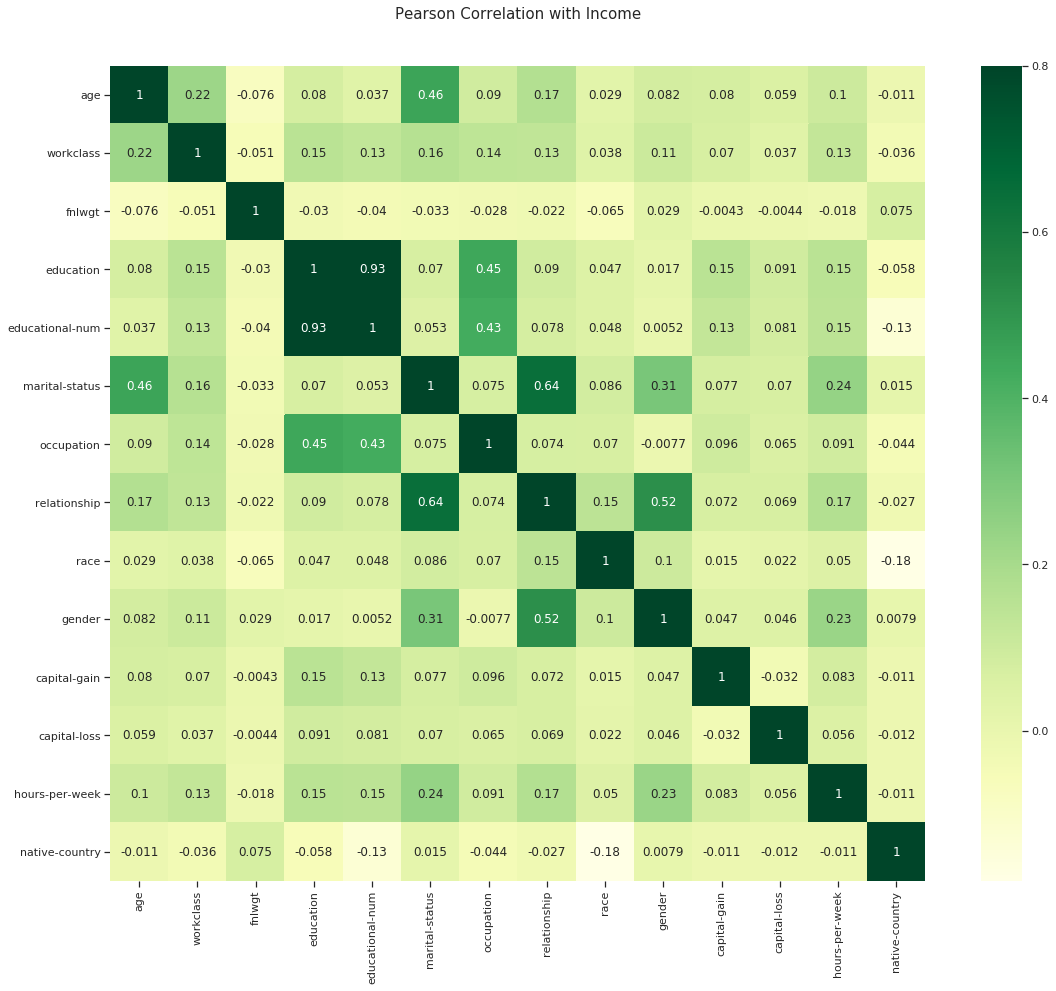

In [97]:
heatMap = catdata.corr()
plt.subplots(figsize=(20, 15))
plt.title('Pearson Correlation with Income', y=1.05, size=15)
sns.heatmap(heatMap, vmax=.8,annot=True,cmap ='YlGn', square=True)


We can see some high corealtion between marital-status and relationship attributes with income. As we have manually encoded the categorical values and married status is coded with higher numerical values, the reliability of this heatmap is still unsure. But, according to our previous histogram plots and visualizations, this heatmap matches and we are still confident that marital status and relationship corelate highly with higher income levels.

In [98]:
census.drop('educational-num_bin', axis=1, inplace=True) #dopping the extra column

# 2.2 Analysis Using Facets

We are using bucketing to bucket the numerical features like age, and transform it into several categorical ones based on the range it falls into. Having this type of visualization can help us dig more information about the income trends using both numerical and categorical attributes.

## Educational-num and Age

In [99]:
Image(url="https://i.imgur.com/m9p92Ul.png")

Earlier, we observed that number of years in school directly correlates with income. However, observing this image, we can see that even though one may have higher educational-num values, his/her chances of having >50k seems to increase only after crossing about 30 years of age. Also, even though people may have lower educational-num values, as their age increase, the chances of them having >50k income also increases substantially.
So, for our classifiers, having a feature which is a constitutes both educational-num and age would help to generalize significantly.

In [100]:
census['education_age'] = census['age']*census['educational-num']  # creating a new feature education_age


In [101]:
census.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_age
0,25,Private,226802,HS-dropout,7,Never-married,Machine-op-inspct,Own-child,Non-White,Male,0,0,40,United-States,<=50K,175
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,342
2,28,Public,336951,Associate,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,336
3,44,Private,160323,Associate,10,Married,Machine-op-inspct,Husband,Non-White,Male,7688,0,40,United-States,>50K,440
5,34,Private,198693,HS-dropout,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,204


## Age and Hours-per-week

In [102]:
Image(url='https://i.imgur.com/paQNOrr.png')

This visualization of age with hours-per-week shows us that the most of the higher income group of people are located in the group where age and hours-per-week are both higher. So, people working more than 40 hours/week and having age >34 having higher chances of earning 50k income. A cross feature using these two feature could be helpful for the prediction models.

In [103]:
census['age_hours'] = census['age']*census['hours-per-week']

In [104]:
census.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_age,age_hours
0,25,Private,226802,HS-dropout,7,Never-married,Machine-op-inspct,Own-child,Non-White,Male,0,0,40,United-States,<=50K,175,1000
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,342,1900
2,28,Public,336951,Associate,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,336,1120
3,44,Private,160323,Associate,10,Married,Machine-op-inspct,Husband,Non-White,Male,7688,0,40,United-States,>50K,440,1760
5,34,Private,198693,HS-dropout,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,204,1020


## Workclass and Age

In [105]:
Image(url='https://i.imgur.com/7Kpq9FY.png')

Earlier, we observed using histograms that people in the self-employed category of workclass have better chances of earning >50k than its counterparts. 
We can dig out more information about the income using both workclass and age features as seen in this image.
For private sector, the chances of having higher income increase with age but only upto around 50-60 year old age. After that age category, people chances of having >50k income seems to be on a decline. Some reasons for this phenomenon would be high-competition and heavy workhours load in the private sector and no source of steady income.

For the public sector, people only start to earn higher after crossing 30-40 age buckets, and there is also a decline in people's earning levels after 50-60 age buckets which might indicate that no steady income sources and people are working less hours as they are getting older.

For self-employed people, similar trends can be observed for chances of earning higher. After crossing 30-40 year age buckets, people have pretty good chances of earning >50k. There also seem to be no decline in the income after 50-60 year brackets, which may indicate that older people having self-employed workclass have far better chances of earning >50k than their counterparts. People in the self-employed category may also have steady income sources from their bussinesses and investments so even though they may not work higher hours due to age, their income is still steady and keeps them in the brackets of people earning >50k.

## Workclass and Hours-per-week

In [106]:
Image(url='https://i.imgur.com/sVmhBAX.png')

Significantly more people in the private and self-employed category are working more hours than the ones in public workclass category. 

## Gender and Age

In [107]:
Image(url='https://i.imgur.com/jondVFP.png')

More men are able to work even in their old years than their female counterparts. As we observed earlier men seem to have significantly higher chances of earning higher than females and this tread only increases as their ages increase.

## Gender and Educational-Num

In [108]:
Image(url='https://i.imgur.com/tG7kgGT.png')

Again, we can observe even though male and females have similar amount of educational-num, their chances of having >50k income differ significantly. Men with similar education as women seem to earn higher incomes.

## Relationship and workclass

In [109]:
Image(url="https://i.imgur.com/isemuZ4.png")

Here, in all of the categories of relationship except husband we can see a decline in number of people working in them from private to public to self-employed. More husbands are in self-employed workclass than public. This can suggest that men who are married are more likely to open bussinesses and become self-employed. 
Also, even though we say a disparity in the income between males and females before, here we can observe that both husband and wife are earning higher than their counterparts in relationship category and both have good chances of earning >50k suggesting married people have higher chances of earning >50k.

## Multivariate Analysis 

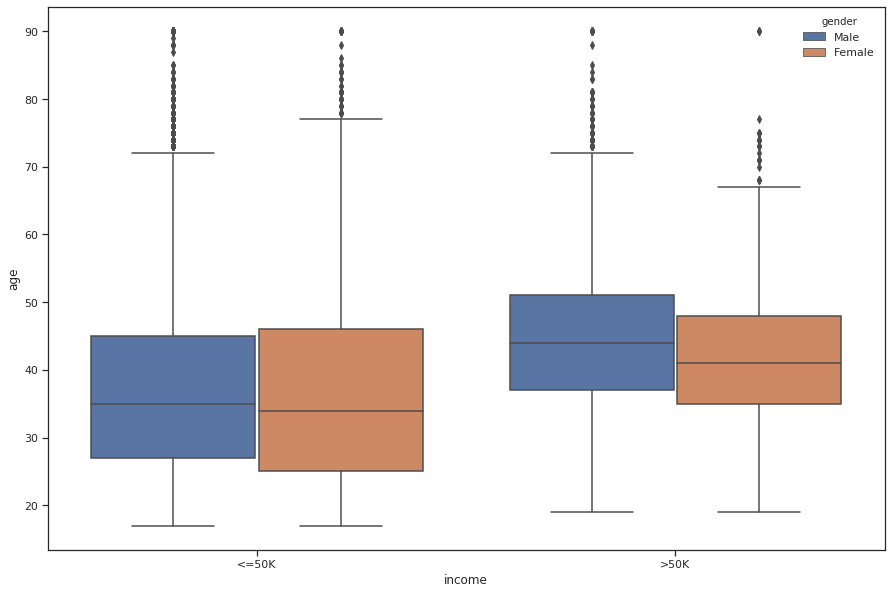

In [110]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="age",hue="gender",data=census)
plt.show()

We can observe that the median difference in ages of males and females gets higher in the higher income bracket, i.e >50k.

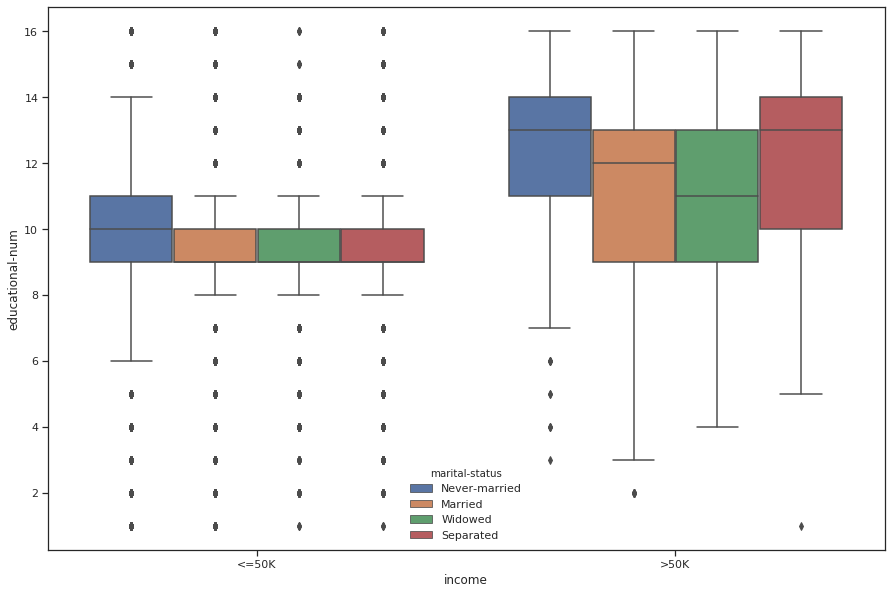

In [111]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="educational-num",hue="marital-status",data=census)
plt.show()

An observation that can be made from this graph is people who are never-married and and separated and making >50k income have significantly higher median number of educational-num than other categories.


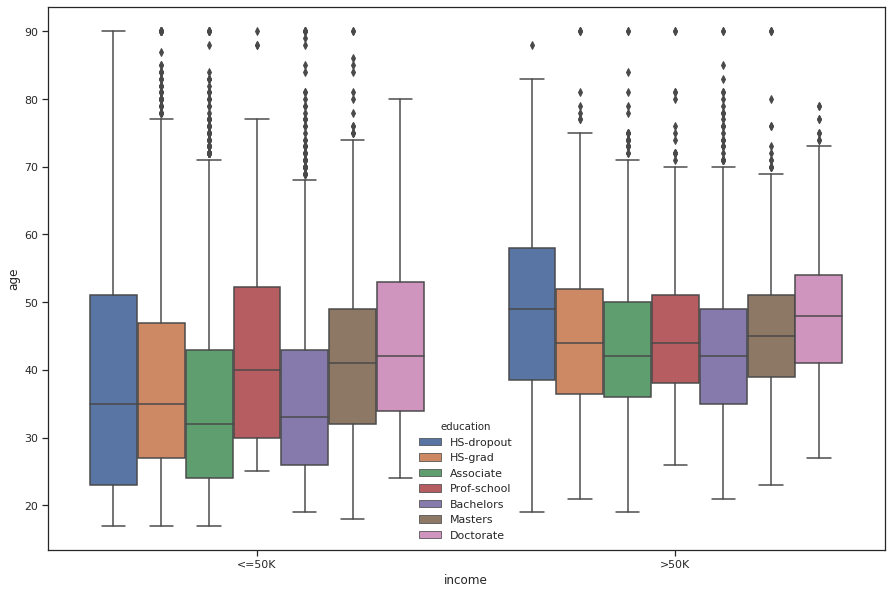

In [112]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="age",hue="education",data=census)
plt.show()

The median age of people who dropped from high school and have income >50k is relatively higher than other groups of education feature.

# 3. Hypothesis Testing (Experimental Design)

## 3.1 Continuous Features

For our continuous features in our data, we use Two Sampled T-test to perform hypothesis testing. This test is also called Independent t-test.

An independent samples t-test can be used because we want to compare the means of a normally distributed interval dependent variable for two independent groups.

Null-hypothesis (H0): It states that the two populations being tested have no statistically significant difference in their mean values.

Alternate-hypothesis (Ha): It states that there is a statistically significant difference present in the mean values of two populations being tested.


The experiment will use t-test values and p-values to reject/accept the null hypothesis. The statistical
significance level of 0.05 will be used.


### 3.1.1 Age

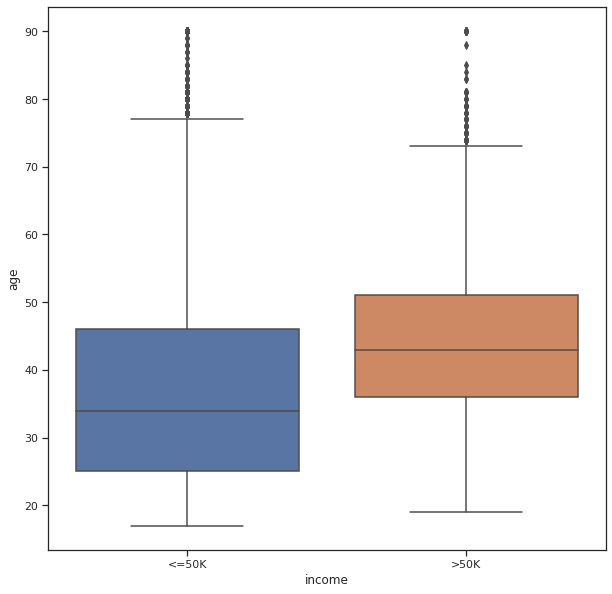

In [113]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

H0: There is no significant difference in the mean age group of people having income >50k and mean age group of people having income <50k.

Ha: There is a significant difference in the mean age group of people having income >50k and mean age group of people having income <50k.

In [49]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [50]:
census['income']=census['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [51]:
census.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [52]:
def getContinousSamples(attribute):

    cfile = census[(np.abs(stats.zscore(census[attribute])) < 3)] 

    income_1 = cfile[cfile['income']==1][attribute]
    income_0 = cfile[cfile['income']==0][attribute]

    income_1 = income_1.values.tolist()
    income_0 = income_0.values.tolist()

    # taking only random 100 ages for each income group

    income_1 = random.sample(income_1, 100)
    income_0 = random.sample(income_0, 100)

    return income_1, income_0

In [53]:
samp1,samp2 = getContinousSamples('age')

In [54]:
def calculate_t_pvalue(samp1, samp2):
    
    ttest,pval = ttest_ind(samp1, samp2 ,equal_var = False)
    print("t-test value: ",ttest)
    print('p-value: ',pval)
    
    
    if pval <0.05:
        print("Null hypothesis rejected")
    else:
        print("We accept the null hypothesis")


In [41]:
calculate_t_pvalue(samp1, samp2)

t-test value:  5.154293742362312
p-value:  6.892820366776663e-07
Null hypothesis rejected


We can conclude that there is a significant difference in the mean ages of income group of people having >50k and <=50k income.


###  3.1.2 Fnlwgt

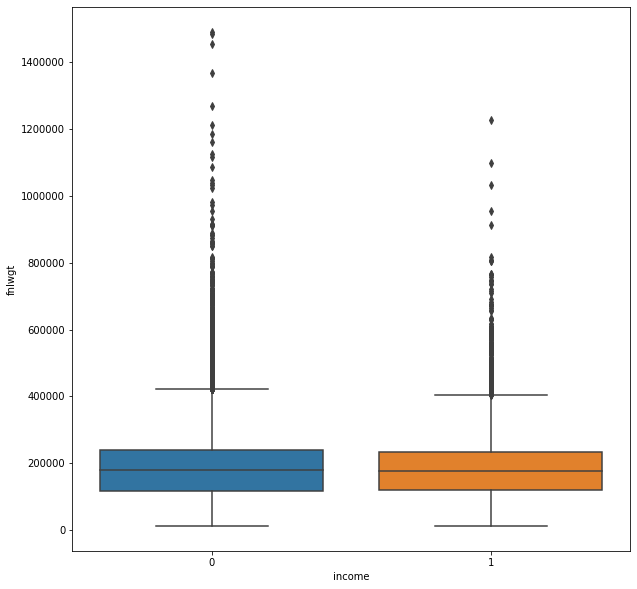

In [15]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="fnlwgt", data=census)
plt.show()

In [122]:
samp11 , samp22 = getContinousSamples('fnlwgt')

In [123]:
calculate_t_pvalue(samp11, samp22)

t-test value:  1.081461687159836
p-value:  0.2808078076809
We accept the null hypothesis


There is no significant different mean difference present and fnlwgt has no contribution in distinguishing the two income groups.

### 3.1.3 Educational-num

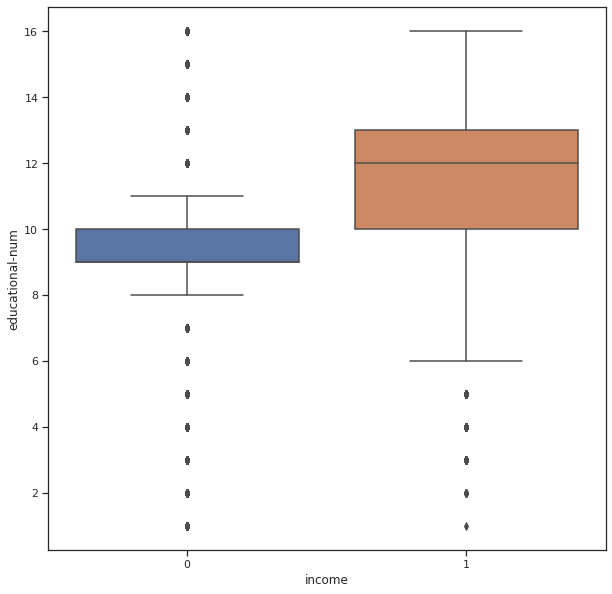

In [124]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="educational-num", data=census)
plt.show()

In [125]:
samp11 , samp22 = getContinousSamples('educational-num')

In [126]:
calculate_t_pvalue(samp11, samp22)

t-test value:  3.6959145973296987
p-value:  0.00028651393529685305
We reject the null hypothesis


There is a significant difference in mean present and educational-num has contribution in distinguishing the two income groups.

### 3.1.4 Capital-gain

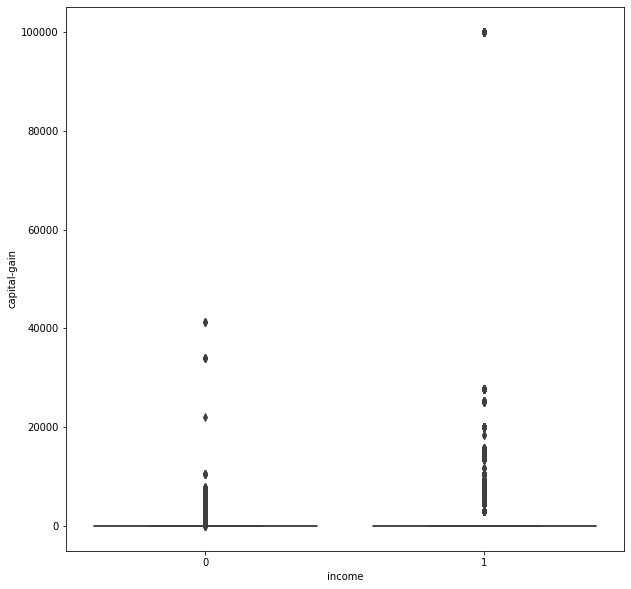

In [42]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="capital-gain", data=census)
plt.show()

In [59]:
samp11 , samp22 = getContinousSamples('capital-gain')

In [60]:
calculate_t_pvalue(samp11, samp22)

t-test value:  4.635601448015492
p-value:  1.0530309074401183e-05
Null hypothesis rejected


There is a significant difference in mean present and capital-gain has contribution in distinguishing the two income groups.

### 3.1.5 Capital-loss

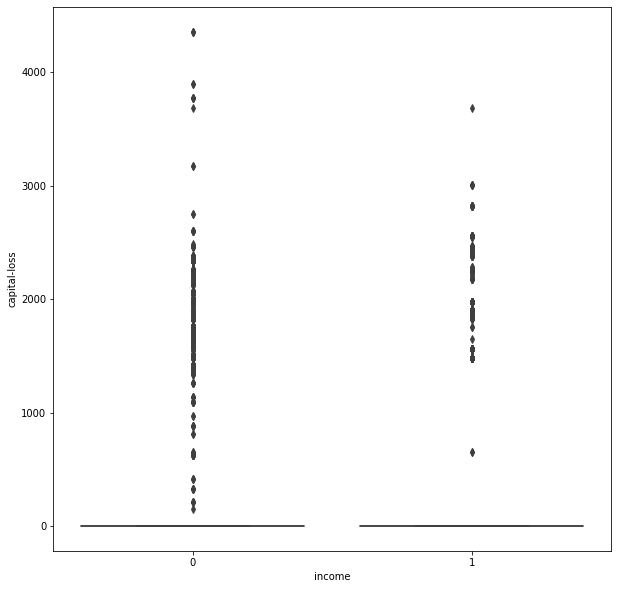

In [18]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="capital-loss", data=census)
plt.show()

In [19]:
samp11 , samp22 = getContinousSamples('capital-loss')

In [20]:
calculate_t_pvalue(samp11, samp22)

t-test value:  -1.0000000000000007
p-value:  0.31974847413930146
We accept the null hypothesis


### 3.1.6 Hours-per-week

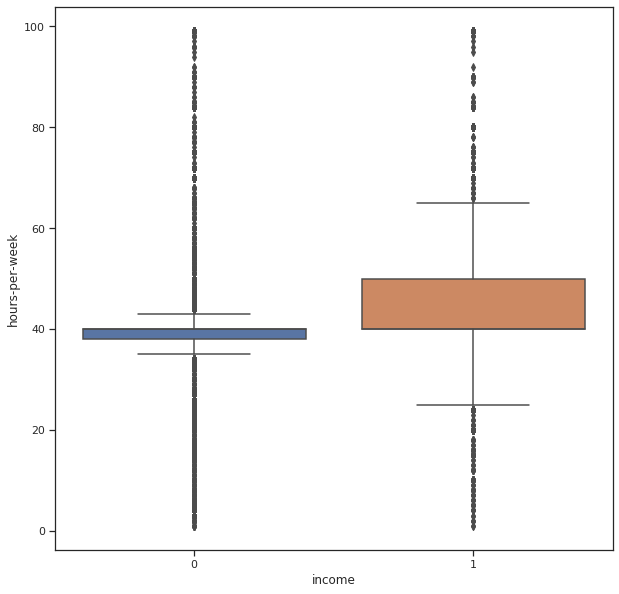

In [133]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=census)
plt.show()

In [134]:
samp1 , samp2 = getContinousSamples('hours-per-week')

In [135]:
calculate_t_pvalue(samp1, samp2)

t-test value:  4.253334859986891
p-value:  3.3198148187216285e-05
We reject the null hypothesis


There is a significant difference in means present and hours-per-week has contribution in distinguishing the two income groups.

## Education_age

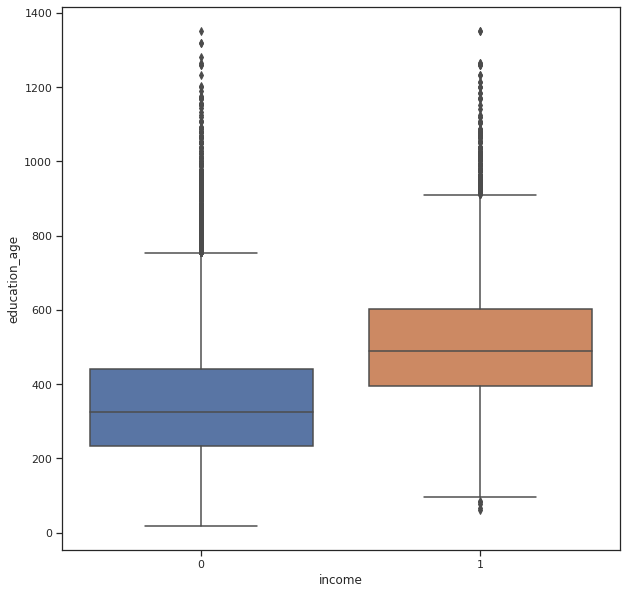

In [136]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="education_age", data=census)
plt.show()

In [137]:
samp1 , samp2 = getContinousSamples('education_age')

In [138]:
calculate_t_pvalue(samp1, samp2)

t-test value:  5.935818791827266
p-value:  1.3122260216148243e-08
We reject the null hypothesis


There is a significant difference in means present and education_age has contribution in distinguishing the two income groups.

## Age_hours

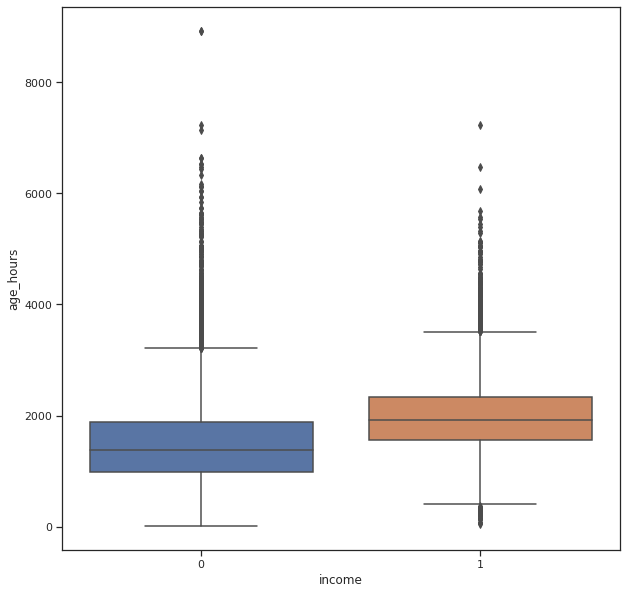

In [139]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age_hours", data=census)
plt.show()

In [140]:
samp1 , samp2 = getContinousSamples('age_hours')

In [141]:
calculate_t_pvalue(samp1, samp2)

t-test value:  5.094046755776836
p-value:  8.494716996182871e-07
We reject the null hypothesis


There is a significant difference in means present and age_hours has contribution in distinguishing the two income groups.

## 3.2 Categorical Features

We'll use Pearson's Chi-square test to analyze the categorical features in our data. 

Null-hypothesis (H0): The variables being tested are independent.

Alternate-hypothesis (Ha): The variables being tested are dependent.

If the Statistic >= Critical Value: We have a significant result, and H0 is rejected and the variables being tested are dependent.

If Statistic < Critical Value: We have a non-significant result, and we accept the H0 indicating the variables being tested are independent.

### 3.2.1 Workclass

In [61]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [63]:
def getChiSquare(catFeature):
    
    c_t = pd.crosstab(census[catFeature].sample(frac=0.002, replace=True, random_state=1),census['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
    print('Contingency table:\n ', c_t)
    
    stat, p, dof, expected = chi2_contingency(c_t)

    print('\n\nDegree of freedom: ',  dof)
    print('p_value: ', p)
    print('Expected: ', expected)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Null hypothesis rejected')
    else:
        print('Accept H0 - Independent')
        

In [144]:
getChiSquare('workclass')

Contingency table:
  income          0   1
workclass            
Private        57  11
Public          3   6
Self-Employed   5  10


Degree of freedom:  2
p_value:  1.8371103693493205e-05
Expected:  [[48.04347826 19.95652174]
 [ 6.35869565  2.64130435]
 [10.59782609  4.40217391]]
probability = 0.950, critical = 5.991, stat = 21.809
Reject H0 - Dependent


We conclude using the chi-square test that income and workclass are dependent upon each other.

### 3.2.2 Education

In [145]:
getChiSquare('education')

Contingency table:
  income        0  1
education         
Associate    21  3
Bachelors     9  9
HS-dropout   11  1
HS-grad      23  6
Masters       0  5
Prof-school   1  3


Degree of freedom:  5
p_value:  6.673451065848875e-05
Expected:  [[16.95652174  7.04347826]
 [12.7173913   5.2826087 ]
 [ 8.47826087  3.52173913]
 [20.48913043  8.51086957]
 [ 3.5326087   1.4673913 ]
 [ 2.82608696  1.17391304]]
probability = 0.950, critical = 11.070, stat = 26.650
Reject H0 - Dependent


We can conclude that there is some dependency of "education" attribute on the target variable "income" by rejecting the H0 based on chi-squared test.

### 3.2.3 Marital-Status

In [65]:
getChiSquare('marital-status')

Contingency table:
  income               0   1
marital-status            
Divorced             6   0
Married-civ-spouse  28  23
Never-married       31   3
Separated            1   1
Widowed              5   0


Degree of freedom:  4
p_value:  0.0009723128666570135
Expected:  [[ 4.34693878  1.65306122]
 [36.94897959 14.05102041]
 [24.63265306  9.36734694]
 [ 1.44897959  0.55102041]
 [ 3.62244898  1.37755102]]
probability = 0.950, critical = 9.488, stat = 18.529
Null hypothesis rejected


We can conclude that is some dependency of "marital-status" attribute on the target variable "income" by rejecting the H0 based on chi-squared test.

### 3.2.4 Occupation

In [147]:
getChiSquare('occupation')

Contingency table:
  income              0  1
occupation              
Adm-clerical       10  1
Craft-repair        8  3
Exec-managerial     5  6
Farming-fishing     0  2
Handlers-cleaners   3  0
Machine-op-inspct   7  0
Other-service       4  0
Priv-house-serv     2  0
Prof-specialty      6  8
Protective-serv     0  1
Sales              16  5
Tech-support        2  0
Transport-moving    2  1


Degree of freedom:  12
p_value:  0.011391788628932762
Expected:  [[ 7.77173913  3.22826087]
 [ 7.77173913  3.22826087]
 [ 7.77173913  3.22826087]
 [ 1.41304348  0.58695652]
 [ 2.11956522  0.88043478]
 [ 4.94565217  2.05434783]
 [ 2.82608696  1.17391304]
 [ 1.41304348  0.58695652]
 [ 9.89130435  4.10869565]
 [ 0.70652174  0.29347826]
 [14.83695652  6.16304348]
 [ 1.41304348  0.58695652]
 [ 2.11956522  0.88043478]]
probability = 0.950, critical = 21.026, stat = 25.817
Reject H0 - Dependent


We can conclude that is some dependency of "occupation" attribute on the target variable "income" by rejecting the H0 based on chi-squared test.

### 3.2.5 Relationship

In [148]:
getChiSquare('relationship')

Contingency table:
  income           0   1
relationship          
Husband         14  23
Not-in-family   24   1
Other-relative   4   0
Own-child       12   0
Unmarried        8   0
Wife             3   3


Degree of freedom:  5
p_value:  3.4965724230000003e-07
Expected:  [[26.14130435 10.85869565]
 [17.66304348  7.33695652]
 [ 2.82608696  1.17391304]
 [ 8.47826087  3.52173913]
 [ 5.65217391  2.34782609]
 [ 4.23913043  1.76086957]]
probability = 0.950, critical = 11.070, stat = 38.165
Reject H0 - Dependent


We can conclude that is some dependency of "relationship" attribute on the target variable "income" by rejecting the H0 based on chi-squared test.

### 3.2.6 Race

In [149]:
getChiSquare('race')

Contingency table:
  income      0   1
race             
Non-White  13   2
White      52  25


Degree of freedom:  1
p_value:  0.23841049417133658
Expected:  [[10.59782609  4.40217391]
 [54.40217391 22.59782609]]
probability = 0.950, critical = 3.841, stat = 1.390
Accept H0 - Independent


We can conclude that is no dependency of "race" attribute on the target variable "income" by accepting the H0 based on chi-squared test.

### 3.2.7 Gender

In [150]:
getChiSquare('gender')

Contingency table:
  income   0   1
gender        
Female  34   3
Male    31  24


Degree of freedom:  1
p_value:  0.0005902216861853654
Expected:  [[26.14130435 10.85869565]
 [38.85869565 16.14130435]]
probability = 0.950, critical = 3.841, stat = 11.807
Reject H0 - Dependent


We can conclude that is some dependency of "gender" attribute on the target variable "income" by rejecting the H0 based on chi-squared test.

### 3.2.8 Native-country

In [151]:
getChiSquare('native-country')

Contingency table:
  income              0   1
native-country           
Non-United-States   3   2
United-States      62  25


Degree of freedom:  1
p_value:  0.9737279754220899
Expected:  [[ 3.5326087  1.4673913]
 [61.4673913 25.5326087]]
probability = 0.950, critical = 3.841, stat = 0.001
Accept H0 - Independent


We can conclude that is no dependency of "native-country" attribute on the target variable "income" by accepting the H0 based on chi-squared test.

In [152]:
census.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_age,age_hours
0,25,Private,226802,HS-dropout,7,Never-married,Machine-op-inspct,Own-child,Non-White,Male,0,0,40,United-States,0,175,1000
1,38,Private,89814,HS-grad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,342,1900
2,28,Public,336951,Associate,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1,336,1120
3,44,Private,160323,Associate,10,Married,Machine-op-inspct,Husband,Non-White,Male,7688,0,40,United-States,1,440,1760
5,34,Private,198693,HS-dropout,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0,204,1020


In [153]:
census.shape

(45981, 17)

In [154]:
census.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,education_age,age_hours
age,1.000000,-0.075538,0.037301,0.079878,0.059353,0.101817,0.237200,0.758302,0.725984
fnlwgt,-0.075538,1.000000,-0.040196,-0.004256,-0.004376,-0.018320,-0.006909,-0.075733,-0.067656
educational-num,0.037301,-0.040196,1.000000,0.126461,0.081474,0.145371,0.332443,0.647090,0.116643
capital-gain,0.079878,-0.004256,0.126461,1.000000,-0.032180,0.082971,0.221689,0.149038,0.116443
capital-loss,0.059353,-0.004376,0.081474,-0.032180,1.000000,0.055500,0.149403,0.098038,0.079282
hours-per-week,0.101817,-0.018320,0.145371,0.082971,0.055500,1.000000,0.226780,0.159477,0.711755
income,0.237200,-0.006909,0.332443,0.221689,0.149403,0.226780,1.000000,0.395061,0.317443
education_age,0.758302,-0.075733,0.647090,0.149038,0.098038,0.159477,0.395061,1.000000,0.610109
age_hours,0.725984,-0.067656,0.116643,0.116443,0.079282,0.711755,0.317443,0.610109,1.000000


# Converting all the features to numerical columns

In [155]:
census_features = census.drop('income', axis=1)

In [156]:
income_labels =  census['income'].copy()


In [157]:
#export_csv = census.to_csv('dataframe.csv')


In [158]:
predictors = ['age','workclass','fnlwgt', 'education','educational-num',
              'marital-status', 'occupation','relationship','race','gender',
              'capital-gain','capital-loss','hours-per-week', 'native-country','education_age', 'age_hours']


high_income = census[census['income'] == 1]
low_income = census[census['income'] == 0]

# stratified sampling
#80% to train set
train = pd.concat([high_income.sample(frac=0.8, random_state=42),
                   low_income.sample(frac=0.8, random_state=42)]) 
y_train = train["income"]
X_train = train[predictors]

#10% to test set
test = pd.concat([high_income.sample(frac=0.1, random_state=42), 
                  low_income.sample(frac=0.1, random_state=42)])
y_test = test["income"]
X_test = test[predictors]

#10% to CV set
cross = pd.concat([high_income.sample(frac=0.1, random_state=42), 
                   low_income.sample(frac=0.1, random_state=42)])

y_cross = cross["income"]
X_cross = cross[predictors]

In [159]:
high_income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_age,age_hours
2,28,Public,336951,Associate,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,1,336,1120
3,44,Private,160323,Associate,10,Married,Machine-op-inspct,Husband,Non-White,Male,7688,0,40,United-States,1,440,1760
7,63,Self-Employed,104626,Prof-school,15,Married,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1,945,2016
10,65,Private,184454,HS-grad,9,Married,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,1,585,2600
14,48,Private,279724,HS-grad,9,Married,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,1,432,2304
15,43,Private,346189,Masters,14,Married,Exec-managerial,Husband,White,Male,0,0,50,United-States,1,602,2150
19,40,Private,85019,Doctorate,16,Married,Prof-specialty,Husband,Non-White,Male,0,0,45,United-States,1,640,1800
20,34,Private,107914,Bachelors,13,Married,Tech-support,Husband,White,Male,0,0,47,United-States,1,442,1598
25,45,Self-Employed,432824,HS-grad,9,Married,Craft-repair,Husband,White,Male,7298,0,90,United-States,1,405,4050
30,46,Public,106444,Associate,10,Married,Exec-managerial,Husband,Non-White,Male,7688,0,38,United-States,1,460,1748


In [160]:
y_train.shape

(36785,)

In [161]:
X_train.shape

(36785, 16)

My first plan was to use OneHotEncoder to transform the categorical features into numerical. However, it has a overhead of using a LabelEncoder and also the output is a numpy array instead of a dataframe. 
Pandas get dummies method seems appropriate in our case sinceit will output a dataframe type after encoding which will be easier to handle.

In [162]:
X_train = pd.get_dummies(X_train, prefix_sep='_', drop_first=True)
X_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_age,age_hours,workclass_Public,workclass_Self-Employed,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States
20207,52,326156,10,0,0,40,520,2080,0,0,...,0,0,1,0,0,0,0,1,1,1
13276,30,143766,13,0,0,40,390,1200,0,0,...,0,0,0,0,0,0,0,1,1,1
20998,34,155343,9,0,1848,50,306,1700,0,0,...,0,0,0,0,0,0,0,1,1,1
15227,39,233117,15,0,0,40,585,1560,0,1,...,0,0,0,0,0,0,0,1,1,1
27893,47,398652,9,0,0,50,423,2350,0,0,...,0,0,0,0,0,0,0,1,1,1


In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

#X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [164]:
X_cross = pd.get_dummies(X_cross, prefix_sep='_', drop_first=True)
X_cross.head()


X_cross = pd.DataFrame(scaler.fit_transform(X_cross), columns = X_cross.columns)

In [165]:
X_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,education_age,age_hours,workclass_Public,workclass_Self-Employed,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States
0,1.018740,1.299399,-0.051703,-0.146753,-0.220095,-0.077245,0.740750,0.665196,-0.406979,-0.371827,...,-0.179159,-0.232663,1.691728,-0.176064,-0.413356,-0.344179,-0.217325,0.408294,0.69079,0.308728
1,-0.647787,-0.438869,1.115580,-0.146753,-0.220095,-0.077245,-0.011060,-0.538060,-0.406979,-0.371827,...,-0.179159,-0.232663,-0.591112,-0.176064,-0.413356,-0.344179,-0.217325,0.408294,0.69079,0.308728
2,-0.344782,-0.328534,-0.440797,-0.146753,4.312362,0.757890,-0.496845,0.145608,-0.406979,-0.371827,...,-0.179159,-0.232663,-0.591112,-0.176064,-0.413356,-0.344179,-0.217325,0.408294,0.69079,0.308728
3,0.033974,0.412691,1.893769,-0.146753,-0.220095,-0.077245,1.116655,-0.045819,-0.406979,2.689422,...,-0.179159,-0.232663,-0.591112,-0.176064,-0.413356,-0.344179,-0.217325,0.408294,0.69079,0.308728
4,0.639984,1.990323,-0.440797,-0.146753,-0.220095,0.757890,0.179784,1.034376,-0.406979,-0.371827,...,-0.179159,-0.232663,-0.591112,-0.176064,-0.413356,-0.344179,-0.217325,0.408294,0.69079,0.308728


In [166]:
X_test = pd.get_dummies(X_test, prefix_sep='_', drop_first=True)
X_test.head()


X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [167]:
pca = PCA(n_components = 32)
    # actually run the fit algorithm
eigenbasis = pca.fit(X_train)
    # transform our data using the learned transform
X_train = eigenbasis.transform(X_train)


NameError: name 'PCA' is not defined

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 32)
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,45,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

The above plot shows that more than 90% of the variance in our data is captured by the first 30 components.

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1
print('The number of dimensions required to preserve 95% of variance is',dim)


In [ ]:
pca= PCA(n_components=0.9)
X_train_reduced = pca.fit_transform(X_train)
X_cross_reduced = pca.fit_transform(X_cross)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn import datasets
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
# import some validation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=50, oob_score=True, n_jobs=-1)
rf.fit(X_train, y_train)
rf.predict(X_cross)
accuracy3 = rf.score(X_test, y_test)
print('accuracy using randomforest:', accuracy3)


In [ ]:
treeclf = tree.DecisionTreeClassifier()
treeclf.fit(X_train, y_train)
accuracy2 = treeclf.score(X_test, y_test)
print('accuracy for decision trees: ', accuracy2)



In [ ]:

# svmLinear = svm.SVC(kernel='linear')
# svmLinear.fit(X_train, y_train)
# accuracy5 = svmLinear.score(X_test, y_test)
# print('accuracy for linearSVM with linear kernel: ', accuracy5)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier #KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

In [ ]:
# extras ...

In [ ]:
# method to draw histogram for categorical attribute

def drawAttribute(att):
    plt.figure(figsize=(12,8))

    total = float(len(census["income"]) )

    ax = sns.countplot(x=att, data=census)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
    plt.show()

drawAttribute("workclass")
getCatIncomePlot("workclass")

After transforming, we have 4 unique categories present in the workclass feature. 
Almost 74% of the people work in private sectors and there are very few number of people unemployed. 
From the 2nd histogram, we can observe that only in the self-employed category more than 50% of the people are earning >50k.

In [ ]:
drawAttribute("education")

## Compare different values of K and N

Repeat the above experiment using the values of K and N below, and report the mean, stdDev, differece between the means, and p-value for each.  The first row has been completed for you (note that your numbers may be slightly different, since this is a stochastic process).  Also notice how long these take to finish (though you don't need to write that down).  Once the table is complete, look at it and try to see what patterns you can spot.

***

Model | Cross-Validation (Mean & stdDev)  |   Train Set |  F1-score (0 label)  | F1-score (1 label)  |  SVM-stdDev  |  difference   |  p-value
------|----------|------------|------------|-----------|--------------|---------------|--------------
kNN     |      0.826472 (0.003569)   |   0.880446    |   0.85    |  0.64    |         | 
Logistic Regression     | 0.846432 (0.002993)   |    0.826145   |   0.86    |  0.68    |   0.016      |     0.025     |   0.000086
Decision Trees    |      0.812322 (0.002750)   |    0.966541   |   0.87    |  0.63    |   0.038      |     0.020     |   0.060000
Gradient Boost    |     0.861278 (0.002881)  |    0.897332   |   0.90    |  0.72    |   0.038      |     0.019     |   8.02e-23
Random Forests   |   0.836406 (0.001156)     |    0.966445   |   0.89    |  0.67    |   0.123      |     0.022     |   0.000719
Cat Boost   |     0.865327 (0.002651)  |    0.879577   |   0.91    |  0.73    |   0.012      |     0.021     |   4.35e-24
SVM   |     0.847915 (0.002664)  |    0.832151   |   0.86    |  0.68    |   0.012      |     0.021     |   4.35e-24
Neural Nets   |     100  |    0.959   |   0.172    |  0.980    |   0.012      |     0.021     |   4.35e-24

## Compare different values of K and N

Repeat the above experiment using the values of K and N below, and report the mean, stdDev, differece between the means, and p-value for each.  The first row has been completed for you (note that your numbers may be slightly different, since this is a stochastic process).  Also notice how long these take to finish (though you don't need to write that down).  Once the table is complete, look at it and try to see what patterns you can spot.

***

Model |  Test Set |  F1-score (0 label)  | F1-score (1 label)  |  SVM-stdDev  |  difference   |  p-value
------|----------|------------|------------|-----------|--------------|---------------
kNN     | 0.822551    |   0.88    |  0.65    |         | 
Logistic Regression     |   0.841688   |   0.89    |  0.69    |   0.016      |     0.025     |   0.000086
Decision Trees    |    0.822660   |   0.88    |  0.67    |   0.038      |     0.020     |   0.060000
Gradient Boost    |    0.865391   |   0.91    |  0.72   |   0.038      |     0.019     |   8.02e-23
Random Forests   |    0.841579   |   0.90    |  0.67    |   0.123      |     0.022     |   0.000719
Cat Boost   |  0.868327   |   0.91    |  0.73    |   0.012      |     0.021     |   4.35e-24
SVM   |     0.849516   |   0.90    |  0.71    |   0.012      |     0.021     |   4.35e-24
Neural Nets   |     100  |    0.959   |   0.172    |  0.980    |   0.012      |     0.021     |   4.35e-24